In [22]:
import pandas as pd
import numpy as np

from collections import defaultdict

import matplotlib.pyplot as plt
%matplotlib inline

#import seaborn as sns

<h1>IMPORTING DATA FROM CSV</h1>


In [23]:
data = pd.read_csv('output.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5461 entries, 0 to 5460
Data columns (total 16 columns):
Unnamed: 0              5461 non-null int64
LabRefNo                5461 non-null int64
RequestDate             5461 non-null object
Patientcode             5461 non-null int64
PatientName             5461 non-null object
PersonDateOfBirth       2545 non-null object
PatientAge              5461 non-null object
Gender                  5461 non-null object
RenderServiceCode       5461 non-null object
Servicename             5461 non-null object
LabParamCode            5461 non-null object
LabParamName            5461 non-null object
LabParamFinalResult     5461 non-null object
RefRangeLowLimit        4331 non-null float64
RefRangeHighLimit       4331 non-null float64
SampleCollectionDate    5453 non-null object
dtypes: float64(2), int64(3), object(11)
memory usage: 682.7+ KB


In [24]:
data.columns
len(data.columns)

16

<h1>Checking Distribution of Data</h1>

In [26]:
#Creating set of different Lab test
labParamNames = set(data['LabParamName'])

print('NO of lab tests:', (labParamNames))


NO of lab tests: {'MCHC (MEAN CORPUSCULAR HB CONC)', 'HAEMOGLOBIN', 'E.S.R.WESTERGREN (AUTOMATED)', 'Blast', 'Myelocyte', 'APO-A1/APO-B', 'Promyelocyte', 'Metamyelocyte', 'LEUKOCYTES ESTERASE', 'L.D.L. CHOLESTEROL(Direct Homogeneous)', 'APOLIPOPROTEIN A-1 (APO A-1)', 'ABSOLUTE LYMPHOCYTE COUNT', 'Lipoprotein [a] level', 'SEGMENTED NEUTROPHILS', 'DC', 'GLUCOSE/REDUCING SUBSTANCES', 'LYMPHOCYTES', 'AMYLASE (Enzymatic Colorimetric)', 'PROSTATE SPECIFIC ANTIGEN', 'PACKED CELL VOLUME', 'MONOCYTES', 'ABSOLUTE EOSINOPHIL COUNT', 'Stab', 'BASOPHILS', 'BLOOD PICTURE', 'CRYSTALS', 'HOMOCYSTEINE LEVEL', 'ALKALINE PHOSPHATASE(Colorimetric)', 'BILIRUBIN (INDIRECT)', 'MCV (MEAN CORPUSCULAR VOLUME)', 'GLUCOSE (Post prandial) ', 'G.G.T.P. (Enzymatic Colorimetric)', 'LEUCOCYTES :', 'ADVICE CPK', 'LEUCOCYTES ', 'BILIRUBIN (DIRECT) (Diazo)', 'SERUM VLDL CHOLESTEROL ( Calculated)', 'FREE THYROXINE [FT4] {ECLIA}', 'UROBILINOGEN', 'U.I.B.C.', 'PHOSPHORUS (Photometric, Molybdate UV)', 'SERUM GLOBULIN', 'TRAN

In [28]:
#Counting Number of each test in data
labParamNameCounts = data['LabParamName'].value_counts(dropna=False)

print('Name of Test\t\t\t\tNo of tests')
print(labParamNameCounts)


Name of Test				No of tests
SODIUM ( Ion Selective Electrode)          52
BLOOD PICTURE                              52
ABSOLUTE BASOPHIL COUNT                    52
BILIRUBIN (TOTAL) (Diazo)                  52
SERUM CHOLESTEROL - TRIGLYCERIDE RATIO     52
NON H.D.L. CHOLESTEROL                     52
URIC ACID (Enzymatic Colorimetric)         52
TOTAL LEUCOCYTE COUNT                      52
*Mean Plasma Glucose                       52
CREATININE (Standardized against IDMS)     52
CHOL_CALC                                  52
SERUM ALBUMIN/GLOBULIN                     52
MAGNESIUM                                  52
IONIZED CALCIUM (Photometric,NM BAPTA)     52
S.G.O.T. (Kinetic)                         52
GLYCOSYLATED HAEMOGLOBIN [HBA1C]           52
MCHC (MEAN CORPUSCULAR HB CONC)            52
L.D.L. CHOLESTEROL(Direct Homogeneous)     52
APOLIPOPROTEIN A-1 (APO A-1)               52
ABSOLUTE LYMPHOCYTE COUNT                  52
Lipoprotein [a] level                      52
AMYLAS

In [29]:
#Note:Gender for all entries is Male...
genderCount = data['Gender'].value_counts()

print('Gender\tNo')
print(genderCount)


Gender	No
MALE    5461
Name: Gender, dtype: int64


In [7]:
#code to check number of positive, negative and undetermined results
check = data[['RefRangeHighLimit','LabParamFinalResult','RefRangeLowLimit']]
inRange, outRange, notnumber = 0, 0, 0
lowLimit, value, highLimit = [], [], []
weird = 0
for i, row in check.iterrows():
    h, v, l = row['RefRangeHighLimit'], row['LabParamFinalResult'], row['RefRangeLowLimit']
    if v.isdigit() or v.replace('.','1').isdigit():
        try:
            h, v, l = float(h), float(v), float(l)
            lowLimit.append(l)
            highLimit.append(h)
            value.append(v)
            if v>=l and v<=h:
                inRange+=1
            else:
                outRange+=1
        except ValueError:
            #what are these tests?
            weird+=1
    else:
        notnumber+=1


In [8]:
#code to check age ranges of patients in data
child, youngAdult, adult, oldAdult = 0, 0 ,0 ,0
for i, v in data['PatientAge'].iteritems():
    age = int(v.split()[0])
    if age in range(19):
        child+=1
    elif age in range(19, 35):
        youngAdult+=1
    elif age in range(35, 61):
        adult+=1
    else:
        oldAdult+=1


In [30]:
#tests per patient
patientset = set(data['PatientName'])
test_per_patient = defaultdict(list)
for name in patientset:
    for k, v in data[data['PatientName']==name].iterrows():
        test_per_patient[name].append(k)

print('Patient\tNo of Tests')
for k, v in test_per_patient.items():
    print(f'{k} {len(v)}')

print('Number of patients:',len(test_per_patient.keys()))


Patient	No of Tests
MR. GAURAV MATHUR 88
MR. SANDEEP YADAV 109
MR. HARISH AHUJA 88
MR. M M CHHABRA 109
MR. JAYANT NANDA 110
MR. R P GUPTA 111
MR. P K DHAWAAN 108
MR. SHARDUL SHROFF 109
MR. UMESH SHARMA 111
MR. S K SEHGAL 108
MR. ARJUN ANAND 109
MR. INDERJEET SINGH 111
MR. ASHOK BHANDARI 88
MR. SIDDHARTH SAHNI 109
MR. ASHOK CHATURVEDI 88
MR. VIKRAM SHRIRAM 88
MR. ARVIND DHAM 88
MR. PRADEEP BATRA 111
MR. RAHUL MALIK 111
MR. ROHIT CHANDRA 108
MR. N S MITTAL 109
JUSTICE. TALWANT SINGH 109
MR. ASHISH CHANANA 111
MR. SUNIL BHARTI MITTAL 109
MR. VARINDER CHHABRA 109
MR. SUSHANT MITTAL 88
MR. UPHAR CHIBBER 108
MR. ROHIT RELAN 108
MR. RAVISH KAPOOR 109
MR. SANJAY AGGARWAL 88
MR. MOHAMED ELKAYED 109
MR. HARSH MEHTA 109
MR. AMAN MUNJAL 88
MR. AMIT SHARMA 112
MR. RAMESH KATHURIA 109
MR. SANJAY GUPTA 108
MR. VAIBHAV JAIPURIA 109
MR. UTTAM ANAND DAVE 112
MR. G K GAMBHIR 88
MR. R K BHANDARI 108
MR. T R PATNAYANK 111
MR. R P N SINGH 110
MR. SUMANT BHARAT RAM 108
MR. MANDEEP SINGH 109
MR. SHEKHAR GUPTA

<h1>Plotting</h1>

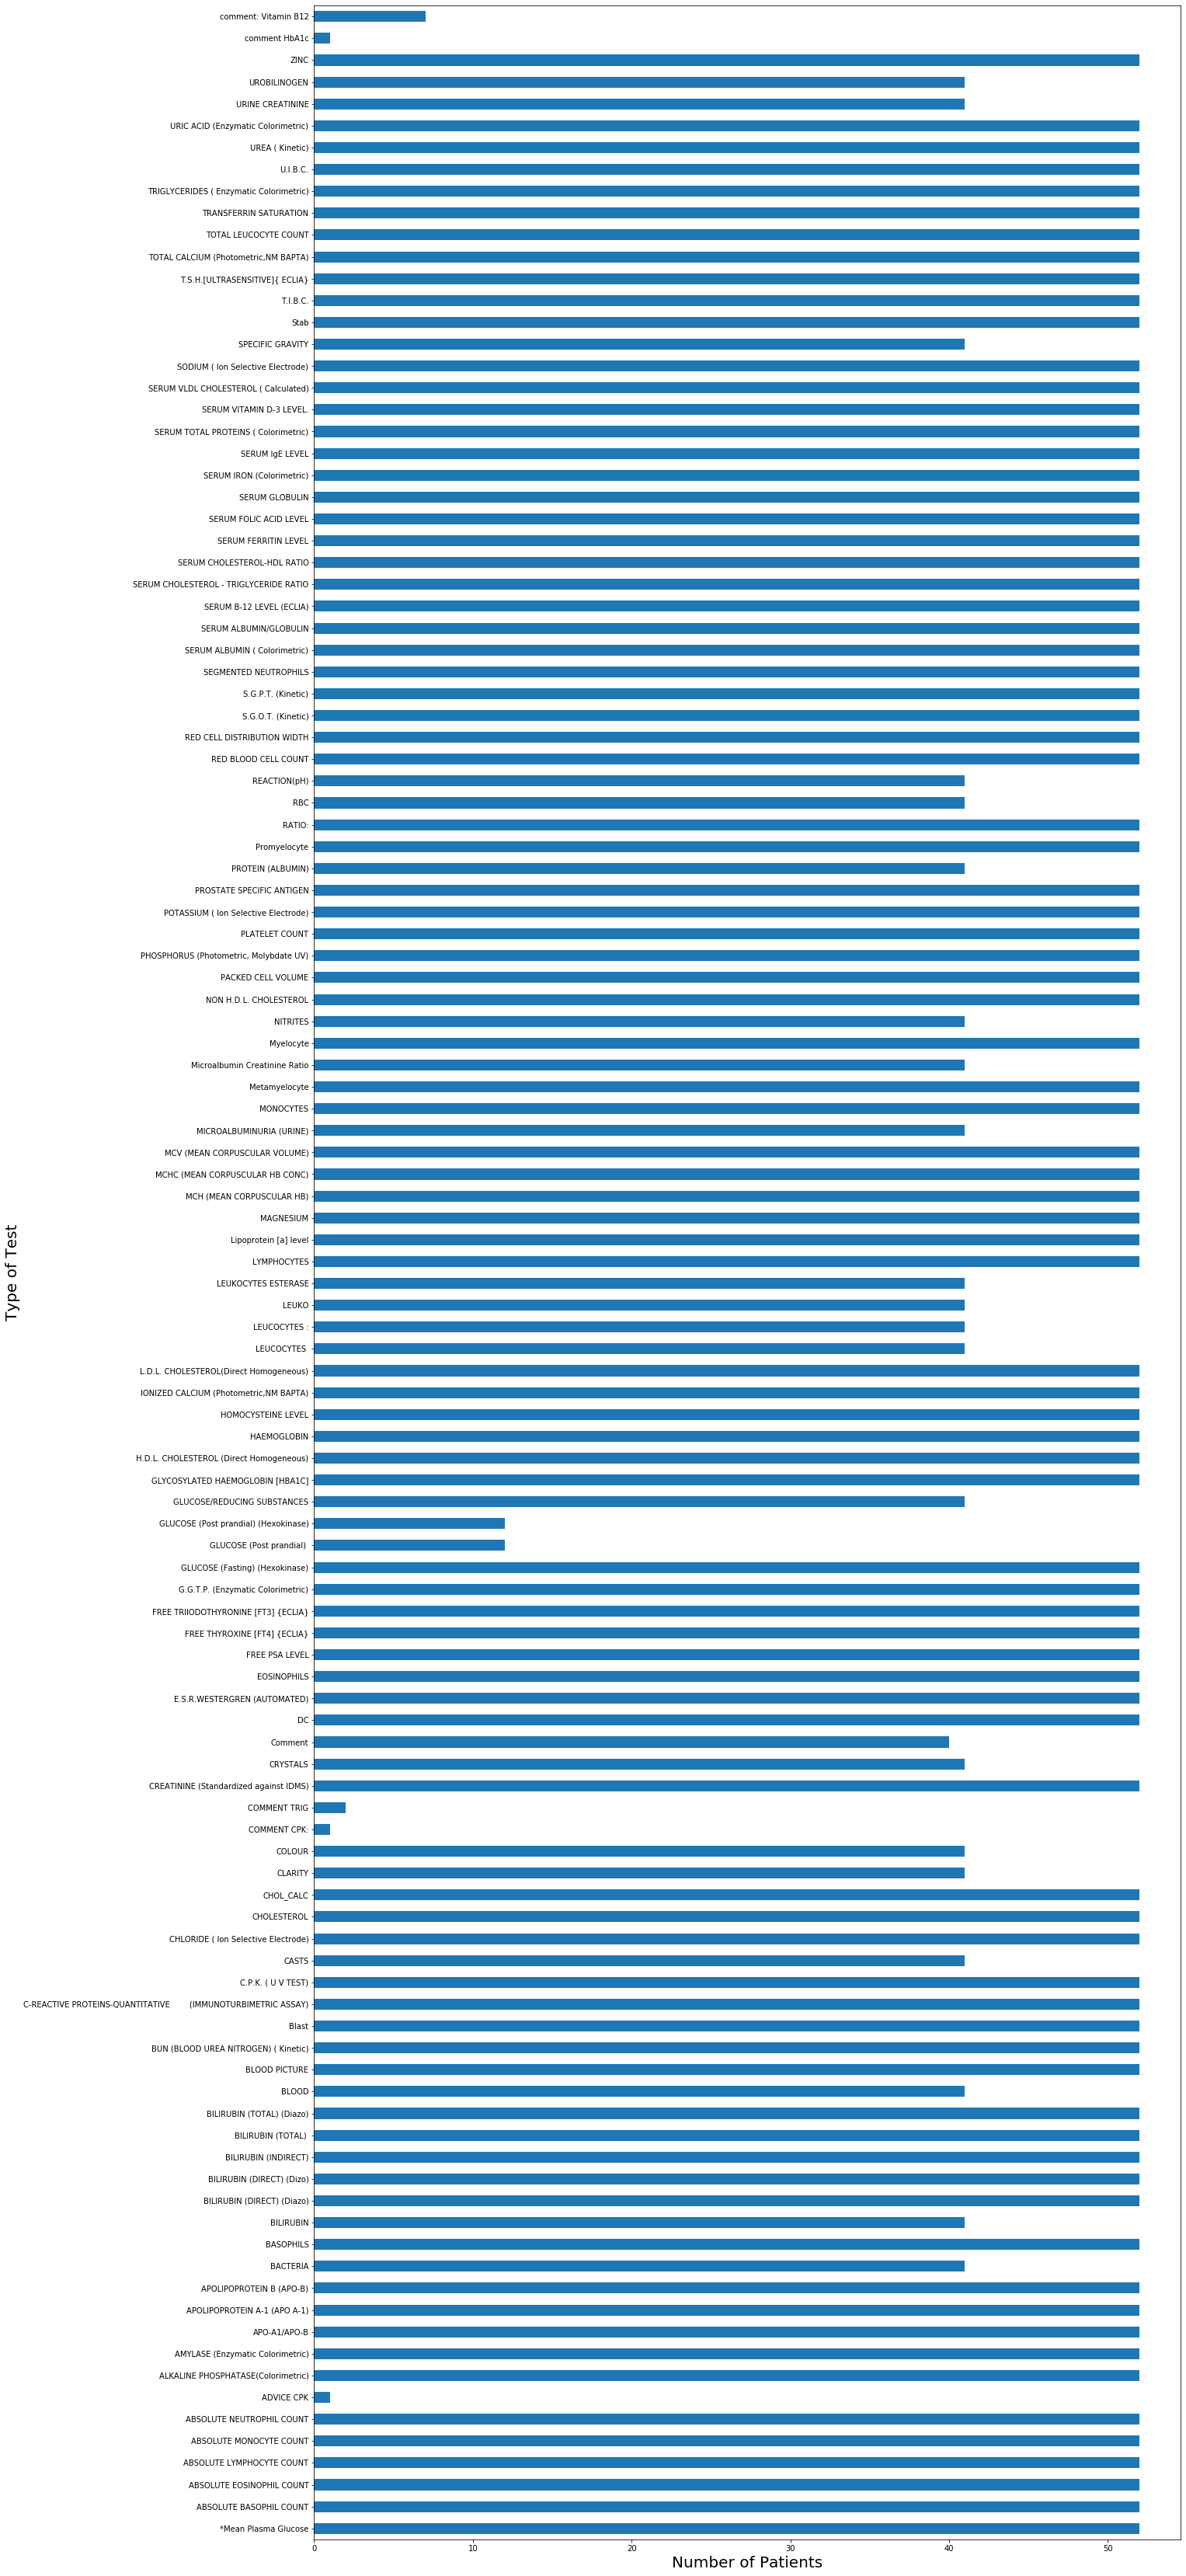

In [32]:
#Plotting values for different types of tests
'''
plt.xlabel('Number of Patients',size=20)
plt.ylabel('Type of Test',size=20)
labParamNameCounts.plot(kind='barh', figsize=(40,40));
'''
plt.xlabel('Number of Patients',size=20)
plt.ylabel('Type of Test',size=20)
data['LabParamName'].value_counts().sort_index().plot(kind='barh', figsize=(20,60));

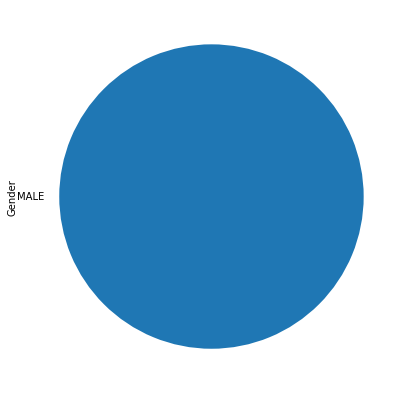

In [11]:
#PATIENT DEMOGRAPHICS
#Plotting gender for tests
'''
plt.tight_layout()
genderCount.plot(kind='pie', figsize=(7,7);
'''
plt.tight_layout()
data.Gender.value_counts().plot(kind='pie',figsize=(7,7));

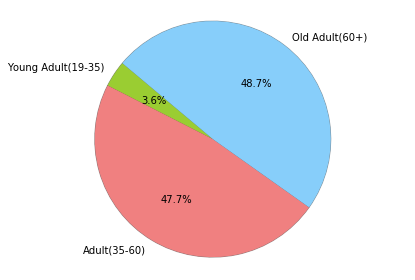

In [12]:

#PATIENT DEMOGRAPHICS
'''
labels = ['Child(0-18)','Young Adult(19-35)','Adult(35-60)','Old Adult(60+)']


sizes = [child, youngAdult, adult, oldAdult]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = [0,0,0,0]

plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%',
 shadow=True, startangle=140)

plt.axis('equal')
plt.show()
'''
#no Child
labels = ['Young Adult(19-35)','Adult(35-60)','Old Adult(60+)']
sizes = [youngAdult, adult, oldAdult]
colors = ['yellowgreen', 'lightcoral', 'lightskyblue']
explode = [0,0,0]

plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%',
 shadow=True, startangle=140,radius=100.5)

plt.axis('equal')
plt.tight_layout()
plt.show()

Average number of tests per patient:  105


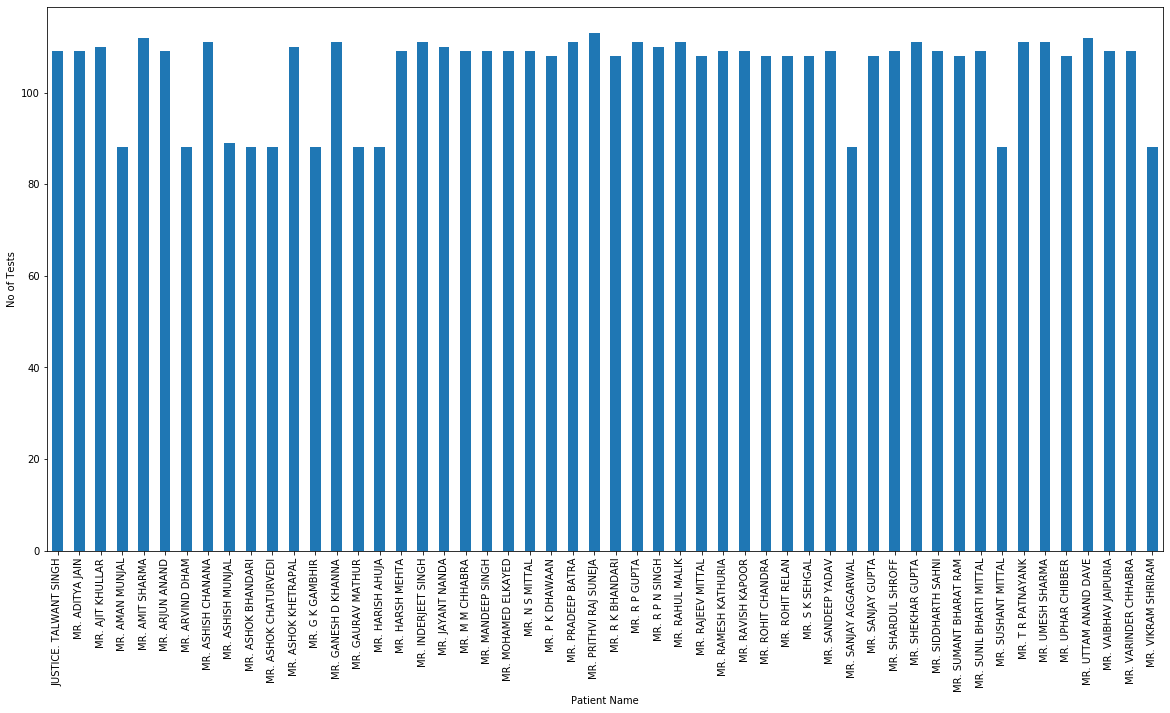

In [13]:
#Patient v/s Number of Tests


plt.xlabel('Patient Name',size=10)
plt.ylabel('No of Tests',size=10)
data['PatientName'].value_counts().sort_index().plot(kind='bar',figsize=(20, 10));

total = sum(data['PatientName'].value_counts())
noOfPatients= len(list(test_per_patient.keys()))
average = total//noOfPatients
print('Average number of tests per patient: ',average)

In [14]:
#TODO:high,low,value

In [15]:
'''
#groupby object applied to  patients
gobject = data.groupby('PatientName')
for key, group in gobject:
    print(key)
    print(list(group['LabParamName']))
'''
#list(data.groupby(['PatientName','LabParamName']))

"\n#groupby object applied to  patients\ngobject = data.groupby('PatientName')\nfor key, group in gobject:\n    print(key)\n    print(list(group['LabParamName']))\n"

In [16]:
#list(data.groupby(['PatientName','LabParamName']))

In [21]:
for key, row in data.groupby(['PatientName','LabParamName']):
    print(key)
    print(row)


('JUSTICE. TALWANT SINGH', '*Mean Plasma Glucose')
     Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
973        1079  200011011  04-02-2020 10-13    200004265   

                PatientName PersonDateOfBirth PatientAge Gender  \
973  JUSTICE. TALWANT SINGH  04-06-1961 00-00  58 Years    MALE   

    RenderServiceCode                       Servicename LabParamCode  \
973             L0271  GLYCOSYLATED HAEMOGLOBIN [HBA1C]      P072384   

             LabParamName LabParamFinalResult  RefRangeLowLimit  \
973  *Mean Plasma Glucose                 143               NaN   

     RefRangeHighLimit SampleCollectionDate  
973                NaN     04-02-2020 10-13  
('JUSTICE. TALWANT SINGH', 'ABSOLUTE BASOPHIL COUNT')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
1049        1161  200011011  04-02-2020 10-13    200004265   

                 PatientName PersonDateOfBirth PatientAge Gender  \
1049  JUSTICE. TALWANT SINGH  04-06-1961 00-00  58 Years    MALE   

   

     Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
969        1075  200011011  04-02-2020 10-13    200004265   

                PatientName PersonDateOfBirth PatientAge Gender  \
969  JUSTICE. TALWANT SINGH  04-06-1961 00-00  58 Years    MALE   

    RenderServiceCode               Servicename LabParamCode  \
969             L0043  BLOOD GLUCOSE (FASTING)       P010409   

                       LabParamName LabParamFinalResult  RefRangeLowLimit  \
969  GLUCOSE (Fasting) (Hexokinase)                  98              60.0   

     RefRangeHighLimit SampleCollectionDate  
969              100.0     04-02-2020 10-13  
('JUSTICE. TALWANT SINGH', 'GLUCOSE/REDUCING SUBSTANCES')
     Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
993        1102  200011011  04-02-2020 10-13    200004265   

                PatientName PersonDateOfBirth PatientAge Gender  \
993  JUSTICE. TALWANT SINGH  04-06-1961 00-00  58 Years    MALE   

    RenderServiceCode                   Servicenam

1029               40.0     04-02-2020 10-13  
('JUSTICE. TALWANT SINGH', 'S.G.P.T. (Kinetic)')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
1030        1141  200011011  04-02-2020 10-13    200004265   

                 PatientName PersonDateOfBirth PatientAge Gender  \
1030  JUSTICE. TALWANT SINGH  04-06-1961 00-00  58 Years    MALE   

     RenderServiceCode            Servicename LabParamCode  \
1030      LAB170000013  LIVER  FUNCTION  TEST      P010396   

            LabParamName LabParamFinalResult  RefRangeLowLimit  \
1030  S.G.P.T. (Kinetic)                22.5               5.0   

      RefRangeHighLimit SampleCollectionDate  
1030               41.0     04-02-2020 10-13  
('JUSTICE. TALWANT SINGH', 'SEGMENTED NEUTROPHILS')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
1043        1155  200011011  04-02-2020 10-13    200004265   

                 PatientName PersonDateOfBirth PatientAge Gender  \
1043  JUSTICE. TALWANT SINGH  04-06-1961 00-0

621               0.0                2.0     01-02-2020 13-53  
('MR. ADITYA JAIN', 'BILIRUBIN')
     Unnamed: 0   LabRefNo       RequestDate  Patientcode      PatientName  \
563         631  200010434  01-02-2020 13-53    160037484  MR. ADITYA JAIN   

    PersonDateOfBirth PatientAge Gender RenderServiceCode  \
563  30-11-1971 00-00  48 Years    MALE             L2080   

                      Servicename LabParamCode LabParamName  \
563  URINE EXAMINATION ( ROUTINE)      P092206    BILIRUBIN   

    LabParamFinalResult  RefRangeLowLimit  RefRangeHighLimit  \
563            NEGATIVE               0.0                0.2   

    SampleCollectionDate  
563     01-02-2020 13-53  
('MR. ADITYA JAIN', 'BILIRUBIN (DIRECT) (Diazo)')
     Unnamed: 0   LabRefNo       RequestDate  Patientcode      PatientName  \
592         661  200010434  01-02-2020 13-53    160037484  MR. ADITYA JAIN   

    PersonDateOfBirth PatientAge Gender RenderServiceCode  \
592  30-11-1971 00-00  48 Years    MALE      

('MR. ADITYA JAIN', 'Lipoprotein [a] level')
     Unnamed: 0   LabRefNo       RequestDate  Patientcode      PatientName  \
528         592  200010434  01-02-2020 13-53    160037484  MR. ADITYA JAIN   

    PersonDateOfBirth PatientAge Gender RenderServiceCode      Servicename  \
528  30-11-1971 00-00  48 Years    MALE             L0063  LIPOPROTEIN [a]   

    LabParamCode           LabParamName LabParamFinalResult  RefRangeLowLimit  \
528      P010054  Lipoprotein [a] level               16.25               0.0   

     RefRangeHighLimit SampleCollectionDate  
528               30.0     01-02-2020 13-53  
('MR. ADITYA JAIN', 'MAGNESIUM')
     Unnamed: 0   LabRefNo       RequestDate  Patientcode      PatientName  \
524         585  200010434  01-02-2020 13-53    160037484  MR. ADITYA JAIN   

    PersonDateOfBirth PatientAge Gender RenderServiceCode Servicename  \
524  30-11-1971 00-00  48 Years    MALE             L0004   MAGNESIUM   

    LabParamCode LabParamName LabParamFinalResult

564     01-02-2020 13-53  
('MR. ADITYA JAIN', 'ZINC')
     Unnamed: 0   LabRefNo       RequestDate  Patientcode      PatientName  \
628         699  200010434  01-02-2020 13-53    160037484  MR. ADITYA JAIN   

    PersonDateOfBirth PatientAge Gender RenderServiceCode Servicename  \
628  30-11-1971 00-00  48 Years    MALE      LAB180000005  ZINC SERUM   

     LabParamCode LabParamName LabParamFinalResult  RefRangeLowLimit  \
628  PRM170000027         ZINC               137.8              75.0   

     RefRangeHighLimit SampleCollectionDate  
628              291.0     01-02-2020 13-53  
('MR. AJIT KHULLAR', '*Mean Plasma Glucose')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode       PatientName  \
1303        1442  200011321  05-02-2020 08-49    150003842  MR. AJIT KHULLAR   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
1303  20-08-1952 00-00  67 Years    MALE             L0271   

                           Servicename LabParamCode          LabParamName

1343              30.0              100.0     05-02-2020 08-51  
('MR. AJIT KHULLAR', 'LEUCOCYTES ')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode       PatientName  \
1327        1469  200011321  05-02-2020 08-49    150003842  MR. AJIT KHULLAR   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
1327  20-08-1952 00-00  67 Years    MALE             L2080   

                       Servicename LabParamCode LabParamName  \
1327  URINE EXAMINATION ( ROUTINE)   P090167URN  LEUCOCYTES    

     LabParamFinalResult  RefRangeLowLimit  RefRangeHighLimit  \
1327                 0-1               0.0                0.0   

     SampleCollectionDate  
1327     05-02-2020 08-49  
('MR. AJIT KHULLAR', 'LEUCOCYTES :')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode       PatientName  \
1328        1470  200011321  05-02-2020 08-49    150003842  MR. AJIT KHULLAR   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
1328  20-08-1952 00-00  67 Years    M

      Unnamed: 0   LabRefNo       RequestDate  Patientcode       PatientName  \
1398        1543  200011321  05-02-2020 08-49    150003842  MR. AJIT KHULLAR   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
1398  20-08-1952 00-00  67 Years    MALE      LAB170000015   

                 Servicename LabParamCode LabParamName LabParamFinalResult  \
1398  COMPLETE  BLOOD  COUNT      P052060         Stab                   0   

      RefRangeLowLimit  RefRangeHighLimit SampleCollectionDate  
1398               NaN                NaN     05-02-2020 08-51  
('MR. AJIT KHULLAR', 'T.I.B.C.')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode       PatientName  \
1305        1445  200011321  05-02-2020 08-49    150003842  MR. AJIT KHULLAR   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
1305  20-08-1952 00-00  67 Years    MALE             L0272   

             Servicename LabParamCode LabParamName LabParamFinalResult  \
1305  SERUM IRON STUDIES      P070

4839               15.0     13-02-2020 11-25  
('MR. AMAN MUNJAL', 'EOSINOPHILS')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode      PatientName  \
4843        5350  200013961  13-02-2020 11-25    150000253  MR. AMAN MUNJAL   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
4843  01-11-1977 00-00  42 Years    MALE      LAB170000015   

                 Servicename LabParamCode LabParamName LabParamFinalResult  \
4843  COMPLETE  BLOOD  COUNT      P050061  EOSINOPHILS                   4   

      RefRangeLowLimit  RefRangeHighLimit SampleCollectionDate  
4843               1.0                6.0     13-02-2020 11-25  
('MR. AMAN MUNJAL', 'FREE PSA LEVEL')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode      PatientName  \
4796        5300  200013961  13-02-2020 11-25    150000253  MR. AMAN MUNJAL   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
4796  01-11-1977 00-00  42 Years    MALE             L0346   

                         

('MR. AMIT SHARMA', 'BILIRUBIN (DIRECT) (Diazo)')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode      PatientName  \
3273        3608  200012638  10-02-2020 08-23    200004742  MR. AMIT SHARMA   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
3273  10-05-1979 00-00  40 Years    MALE      LAB170000013   

                Servicename LabParamCode                LabParamName  \
3273  LIVER  FUNCTION  TEST      P010399  BILIRUBIN (DIRECT) (Diazo)   

     LabParamFinalResult  RefRangeLowLimit  RefRangeHighLimit  \
3273                0.29               0.0                0.3   

     SampleCollectionDate  
3273     10-02-2020 08-28  
('MR. AMIT SHARMA', 'BILIRUBIN (DIRECT) (Dizo)')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode      PatientName  \
3274        3609  200012638  10-02-2020 08-23    200004742  MR. AMIT SHARMA   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
3274  10-05-1979 00-00  40 Years    MALE      LAB170000013   

 

('MR. AMIT SHARMA', 'MONOCYTES')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode      PatientName  \
3284        3620  200012638  10-02-2020 08-23    200004742  MR. AMIT SHARMA   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
3284  10-05-1979 00-00  40 Years    MALE      LAB170000015   

                 Servicename LabParamCode LabParamName LabParamFinalResult  \
3284  COMPLETE  BLOOD  COUNT      P050060    MONOCYTES                   6   

      RefRangeLowLimit  RefRangeHighLimit SampleCollectionDate  
3284               2.0               10.0     10-02-2020 08-28  
('MR. AMIT SHARMA', 'Metamyelocyte')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode      PatientName  \
3306        3642  200012638  10-02-2020 08-23    200004742  MR. AMIT SHARMA   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
3306  10-05-1979 00-00  40 Years    MALE      LAB170000015   

                 Servicename LabParamCode   LabParamName LabParamFinalResul

      Unnamed: 0   LabRefNo       RequestDate  Patientcode      PatientName  \
5148        5693  200014283  14-02-2020 09-46    160056635  MR. ARJUN ANAND   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
5148               NaN  39 Years    MALE      LAB170000015   

                 Servicename LabParamCode             LabParamName  \
5148  COMPLETE  BLOOD  COUNT      P050430  ABSOLUTE BASOPHIL COUNT   

     LabParamFinalResult  RefRangeLowLimit  RefRangeHighLimit  \
5148                   0               0.0              200.0   

     SampleCollectionDate  
5148     14-02-2020 09-46  
('MR. ARJUN ANAND', 'ABSOLUTE EOSINOPHIL COUNT')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode      PatientName  \
5149        5694  200014283  14-02-2020 09-46    160056635  MR. ARJUN ANAND   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
5149               NaN  39 Years    MALE      LAB170000015   

                 Servicename LabParamCode              

5107     14-02-2020 09-46  
('MR. ARJUN ANAND', 'LYMPHOCYTES')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode      PatientName  \
5143        5688  200014283  14-02-2020 09-46    160056635  MR. ARJUN ANAND   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
5143               NaN  39 Years    MALE      LAB170000015   

                 Servicename LabParamCode LabParamName LabParamFinalResult  \
5143  COMPLETE  BLOOD  COUNT      P050059  LYMPHOCYTES                  39   

      RefRangeLowLimit  RefRangeHighLimit SampleCollectionDate  
5143              20.0               40.0     14-02-2020 09-46  
('MR. ARJUN ANAND', 'Lipoprotein [a] level')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode      PatientName  \
5069        5608  200014283  14-02-2020 09-46    160056635  MR. ARJUN ANAND   

     PersonDateOfBirth PatientAge Gender RenderServiceCode      Servicename  \
5069               NaN  39 Years    MALE             L0063  LIPOPROTEIN [a]   

   

5121               8.6               10.0     14-02-2020 09-46  
('MR. ARJUN ANAND', 'TOTAL LEUCOCYTE COUNT')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode      PatientName  \
5160        5705  200014283  14-02-2020 09-46    160056635  MR. ARJUN ANAND   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
5160               NaN  39 Years    MALE      LAB170000015   

                 Servicename LabParamCode           LabParamName  \
5160  COMPLETE  BLOOD  COUNT      P050458  TOTAL LEUCOCYTE COUNT   

     LabParamFinalResult  RefRangeLowLimit  RefRangeHighLimit  \
5160                6710            4000.0            11000.0   

     SampleCollectionDate  
5160     14-02-2020 09-46  
('MR. ARJUN ANAND', 'TRANSFERRIN SATURATION')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode      PatientName  \
5075        5615  200014283  14-02-2020 09-46    160056635  MR. ARJUN ANAND   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
5075           

      Unnamed: 0   LabRefNo       RequestDate  Patientcode      PatientName  \
4929        5449  200014202  14-02-2020 08-15    150001071  MR. ARVIND DHAM   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
4929  15-02-1961 00-00  58 Years    MALE      LAB170000015   

                 Servicename LabParamCode LabParamName LabParamFinalResult  \
4929  COMPLETE  BLOOD  COUNT      P050059  LYMPHOCYTES                  43   

      RefRangeLowLimit  RefRangeHighLimit SampleCollectionDate  
4929              20.0               40.0     14-02-2020 08-15  
('MR. ARVIND DHAM', 'Lipoprotein [a] level')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode      PatientName  \
4873        5389  200014202  14-02-2020 08-15    150001071  MR. ARVIND DHAM   

     PersonDateOfBirth PatientAge Gender RenderServiceCode      Servicename  \
4873  15-02-1961 00-00  58 Years    MALE             L0063  LIPOPROTEIN [a]   

     LabParamCode           LabParamName LabParamFinalResult  \
48

5261             4800.0     14-02-2020 10-28  
('MR. ASHISH CHANANA', 'ABSOLUTE MONOCYTE COUNT')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
5262        5817  200014321  14-02-2020 10-28    160025583   

             PatientName PersonDateOfBirth PatientAge Gender  \
5262  MR. ASHISH CHANANA  10-03-1967 00-00  52 Years    MALE   

     RenderServiceCode             Servicename LabParamCode  \
5262      LAB170000015  COMPLETE  BLOOD  COUNT      P050433   

                 LabParamName LabParamFinalResult  RefRangeLowLimit  \
5262  ABSOLUTE MONOCYTE COUNT                 622               0.0   

      RefRangeHighLimit SampleCollectionDate  
5262              800.0     14-02-2020 10-28  
('MR. ASHISH CHANANA', 'ABSOLUTE NEUTROPHIL COUNT')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
5263        5818  200014321  14-02-2020 10-28    160025583   

             PatientName PersonDateOfBirth PatientAge Gender  \
5263  MR. ASHISH CHANANA  10-03-1967 00-00  

5176     14-02-2020 10-28  
('MR. ASHISH CHANANA', 'MCH (MEAN CORPUSCULAR HB)')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
5265        5820  200014321  14-02-2020 10-28    160025583   

             PatientName PersonDateOfBirth PatientAge Gender  \
5265  MR. ASHISH CHANANA  10-03-1967 00-00  52 Years    MALE   

     RenderServiceCode             Servicename LabParamCode  \
5265      LAB170000015  COMPLETE  BLOOD  COUNT      P050446   

                   LabParamName LabParamFinalResult  RefRangeLowLimit  \
5265  MCH (MEAN CORPUSCULAR HB)                27.9              26.0   

      RefRangeHighLimit SampleCollectionDate  
5265               32.0     14-02-2020 10-28  
('MR. ASHISH CHANANA', 'MCHC (MEAN CORPUSCULAR HB CONC)')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
5266        5821  200014321  14-02-2020 10-28    160025583   

             PatientName PersonDateOfBirth PatientAge Gender  \
5266  MR. ASHISH CHANANA  10-03-1967 00-00  52 Year

5221              50.0              150.0     14-02-2020 10-28  
('MR. ASHISH CHANANA', 'U.I.B.C.')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
5187        5737  200014321  14-02-2020 10-28    160025583   

             PatientName PersonDateOfBirth PatientAge Gender  \
5187  MR. ASHISH CHANANA  10-03-1967 00-00  52 Years    MALE   

     RenderServiceCode         Servicename LabParamCode LabParamName  \
5187             L0272  SERUM IRON STUDIES   PRM1500022     U.I.B.C.   

     LabParamFinalResult  RefRangeLowLimit  RefRangeHighLimit  \
5187               222.7             125.0              345.0   

     SampleCollectionDate  
5187     14-02-2020 10-28  
('MR. ASHISH CHANANA', 'UREA ( Kinetic)')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
5229        5783  200014321  14-02-2020 10-28    160025583   

             PatientName PersonDateOfBirth PatientAge Gender  \
5229  MR. ASHISH CHANANA  10-03-1967 00-00  52 Years    MALE   

     RenderService

('MR. ASHISH MUNJAL', 'SERUM CHOLESTEROL - TRIGLYCERIDE RATIO')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode        PatientName  \
5317        5879  200014363  14-02-2020 11-08    150011230  MR. ASHISH MUNJAL   

     PersonDateOfBirth PatientAge Gender RenderServiceCode     Servicename  \
5317               NaN  72 Years    MALE      LAB170000011  LIPID  PROFILE   

     LabParamCode                            LabParamName LabParamFinalResult  \
5317      P010417  SERUM CHOLESTEROL - TRIGLYCERIDE RATIO                0.87   

      RefRangeLowLimit  RefRangeHighLimit SampleCollectionDate  
5317               NaN                NaN     14-02-2020 11-08  
('MR. ASHISH MUNJAL', 'SERUM CHOLESTEROL-HDL RATIO')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode        PatientName  \
5316        5878  200014363  14-02-2020 11-08    150011230  MR. ASHISH MUNJAL   

     PersonDateOfBirth PatientAge Gender RenderServiceCode     Servicename  \
5316               NaN  72 Ye

3669     10-02-2020 10-47  
('MR. ASHOK BHANDARI', 'CHOL_CALC')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
3676        4054  200012779  10-02-2020 10-47    200004765   

             PatientName PersonDateOfBirth PatientAge Gender  \
3676  MR. ASHOK BHANDARI               NaN  70 Years    MALE   

     RenderServiceCode     Servicename LabParamCode LabParamName  \
3676      LAB170000011  LIPID  PROFILE      P012670    CHOL_CALC   

     LabParamFinalResult  RefRangeLowLimit  RefRangeHighLimit  \
3676              253.79               NaN                NaN   

     SampleCollectionDate  
3676     10-02-2020 10-47  
('MR. ASHOK BHANDARI', 'CREATININE (Standardized against IDMS)')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
3682        4061  200012779  10-02-2020 10-47    200004765   

             PatientName PersonDateOfBirth PatientAge Gender  \
3682  MR. ASHOK BHANDARI               NaN  70 Years    MALE   

     RenderServiceCode             Serv

      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
3654        4031  200012779  10-02-2020 10-47    200004765   

             PatientName PersonDateOfBirth PatientAge Gender  \
3654  MR. ASHOK BHANDARI               NaN  70 Years    MALE   

     RenderServiceCode         Servicename LabParamCode LabParamName  \
3654             L0272  SERUM IRON STUDIES   PRM1500022     U.I.B.C.   

     LabParamFinalResult  RefRangeLowLimit  RefRangeHighLimit  \
3654               233.2             125.0              345.0   

     SampleCollectionDate  
3654     10-02-2020 10-47  
('MR. ASHOK BHANDARI', 'UREA ( Kinetic)')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
3678        4057  200012779  10-02-2020 10-47    200004765   

             PatientName PersonDateOfBirth PatientAge Gender  \
3678  MR. ASHOK BHANDARI               NaN  70 Years    MALE   

     RenderServiceCode             Servicename LabParamCode     LabParamName  \
3678      LAB170000012  KIDNEY  FUNCTI

440     01-02-2020 10-55  
('MR. ASHOK CHATURVEDI', 'MAGNESIUM')
     Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
436         484  200010294  01-02-2020 10-55    160030808   

              PatientName PersonDateOfBirth PatientAge Gender  \
436  MR. ASHOK CHATURVEDI               NaN  55 Years    MALE   

    RenderServiceCode Servicename LabParamCode LabParamName  \
436             L0004   MAGNESIUM      P010381    MAGNESIUM   

    LabParamFinalResult  RefRangeLowLimit  RefRangeHighLimit  \
436                2.04               1.6                2.6   

    SampleCollectionDate  
436     01-02-2020 10-55  
('MR. ASHOK CHATURVEDI', 'MCH (MEAN CORPUSCULAR HB)')
     Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
507         562  200010294  01-02-2020 10-55    160030808   

              PatientName PersonDateOfBirth PatientAge Gender  \
507  MR. ASHOK CHATURVEDI               NaN  55 Years    MALE   

    RenderServiceCode             Servicename LabParamCode  \
5

2550             7700.0     07-02-2020 11-15  
('MR. ASHOK KHETRAPAL', 'ALKALINE PHOSPHATASE(Colorimetric)')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
2533        2795  200012150  07-02-2020 11-15    200004598   

              PatientName PersonDateOfBirth PatientAge Gender  \
2533  MR. ASHOK KHETRAPAL               NaN  64 Years    MALE   

     RenderServiceCode            Servicename LabParamCode  \
2533      LAB170000013  LIVER  FUNCTION  TEST      P010400   

                            LabParamName LabParamFinalResult  \
2533  ALKALINE PHOSPHATASE(Colorimetric)                  98   

      RefRangeLowLimit  RefRangeHighLimit SampleCollectionDate  
2533              40.0              129.0     07-02-2020 11-15  
('MR. ASHOK KHETRAPAL', 'AMYLASE (Enzymatic Colorimetric)')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
2464        2721  200012150  07-02-2020 11-15    200004598   

              PatientName PersonDateOfBirth PatientAge Gender  \
2

2545               50.0     07-02-2020 11-15  
('MR. ASHOK KHETRAPAL', 'PHOSPHORUS (Photometric, Molybdate UV)')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
2522        2784  200012150  07-02-2020 11-15    200004598   

              PatientName PersonDateOfBirth PatientAge Gender  \
2522  MR. ASHOK KHETRAPAL               NaN  64 Years    MALE   

     RenderServiceCode             Servicename LabParamCode  \
2522      LAB170000012  KIDNEY  FUNCTION  TEST      P010401   

                                LabParamName LabParamFinalResult  \
2522  PHOSPHORUS (Photometric, Molybdate UV)                3.62   

      RefRangeLowLimit  RefRangeHighLimit SampleCollectionDate  
2522               2.5                4.5     07-02-2020 11-15  
('MR. ASHOK KHETRAPAL', 'PLATELET COUNT')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
2555        2818  200012150  07-02-2020 11-15    200004598   

              PatientName PersonDateOfBirth PatientAge Gender  \
2555 

2963     08-02-2020 10-49  
('MR. G K GAMBHIR', 'ABSOLUTE LYMPHOCYTE COUNT')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode      PatientName  \
2964        3266  200012475  08-02-2020 10-49    180097237  MR. G K GAMBHIR   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
2964               NaN  60 Years    MALE      LAB170000015   

                 Servicename LabParamCode               LabParamName  \
2964  COMPLETE  BLOOD  COUNT      P050432  ABSOLUTE LYMPHOCYTE COUNT   

     LabParamFinalResult  RefRangeLowLimit  RefRangeHighLimit  \
2964                1968            1000.0             4800.0   

     SampleCollectionDate  
2964     08-02-2020 10-49  
('MR. G K GAMBHIR', 'ABSOLUTE MONOCYTE COUNT')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode      PatientName  \
2965        3267  200012475  08-02-2020 10-49    180097237  MR. G K GAMBHIR   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
2965               NaN  60 Years    MAL

2970     08-02-2020 10-49  
('MR. G K GAMBHIR', 'MONOCYTES')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode      PatientName  \
2958        3260  200012475  08-02-2020 10-49    180097237  MR. G K GAMBHIR   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
2958               NaN  60 Years    MALE      LAB170000015   

                 Servicename LabParamCode LabParamName LabParamFinalResult  \
2958  COMPLETE  BLOOD  COUNT      P050060    MONOCYTES                   6   

      RefRangeLowLimit  RefRangeHighLimit SampleCollectionDate  
2958               2.0               10.0     08-02-2020 10-49  
('MR. G K GAMBHIR', 'Metamyelocyte')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode      PatientName  \
2980        3282  200012475  08-02-2020 10-49    180097237  MR. G K GAMBHIR   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
2980               NaN  60 Years    MALE      LAB170000015   

                 Servicename LabParamCode   Lab

      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
1670        1851  200011657  06-02-2020 08-13    160025434   

              PatientName PersonDateOfBirth PatientAge Gender  \
1670  MR. GANESH D KHANNA  10-06-1951 00-00  68 Years    MALE   

     RenderServiceCode             Servicename LabParamCode  \
1670      LAB170000015  COMPLETE  BLOOD  COUNT      P050434   

                   LabParamName LabParamFinalResult  RefRangeLowLimit  \
1670  ABSOLUTE NEUTROPHIL COUNT                5643            1800.0   

      RefRangeHighLimit SampleCollectionDate  
1670             7700.0     06-02-2020 08-15  
('MR. GANESH D KHANNA', 'ALKALINE PHOSPHATASE(Colorimetric)')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
1653        1833  200011657  06-02-2020 08-13    160025434   

              PatientName PersonDateOfBirth PatientAge Gender  \
1653  MR. GANESH D KHANNA  10-06-1951 00-00  68 Years    MALE   

     RenderServiceCode            Servicename LabParamCode

      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
1605        1782  200011657  06-02-2020 08-13    160025434   

              PatientName PersonDateOfBirth PatientAge Gender  \
1605  MR. GANESH D KHANNA  10-06-1951 00-00  68 Years    MALE   

     RenderServiceCode   Servicename LabParamCode        LabParamName  \
1605             L2011  HOMOCYSTEINE      P072022  HOMOCYSTEINE LEVEL   

     LabParamFinalResult  RefRangeLowLimit  RefRangeHighLimit  \
1605               11.09               5.0               15.0   

     SampleCollectionDate  
1605     06-02-2020 08-15  
('MR. GANESH D KHANNA', 'IONIZED CALCIUM (Photometric,NM BAPTA)')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
1638        1818  200011657  06-02-2020 08-13    160025434   

              PatientName PersonDateOfBirth PatientAge Gender  \
1638  MR. GANESH D KHANNA  10-06-1951 00-00  68 Years    MALE   

     RenderServiceCode             Servicename LabParamCode  \
1638      LAB170000012  K

      Unnamed: 0   LabRefNo       RequestDate  Patientcode        PatientName  \
3871        4276  200012815  10-02-2020 11-25    170063336  MR. GAURAV MATHUR   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
3871               NaN  36 Years    MALE      LAB170000013   

                Servicename LabParamCode                        LabParamName  \
3871  LIVER  FUNCTION  TEST      P010400  ALKALINE PHOSPHATASE(Colorimetric)   

     LabParamFinalResult  RefRangeLowLimit  RefRangeHighLimit  \
3871                  52              40.0              129.0   

     SampleCollectionDate  
3871     10-02-2020 11-25  
('MR. GAURAV MATHUR', 'AMYLASE (Enzymatic Colorimetric)')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode        PatientName  \
3821        4222  200012815  10-02-2020 11-25    170063336  MR. GAURAV MATHUR   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
3821               NaN  36 Years    MALE             L0032   

                  

      Unnamed: 0   LabRefNo       RequestDate  Patientcode        PatientName  \
3878        4284  200012815  10-02-2020 11-25    170063336  MR. GAURAV MATHUR   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
3878               NaN  36 Years    MALE      LAB170000015   

                 Servicename LabParamCode           LabParamName  \
3878  COMPLETE  BLOOD  COUNT      P050058  SEGMENTED NEUTROPHILS   

     LabParamFinalResult  RefRangeLowLimit  RefRangeHighLimit  \
3878                  25              40.0               80.0   

     SampleCollectionDate  
3878     10-02-2020 11-25  
('MR. GAURAV MATHUR', 'SERUM ALBUMIN ( Colorimetric)')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode        PatientName  \
3874        4279  200012815  10-02-2020 11-25    170063336  MR. GAURAV MATHUR   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
3874               NaN  36 Years    MALE      LAB170000013   

                Servicename LabParamCode     

3801                NaN                  NaN  
('MR. HARISH AHUJA', 'BUN (BLOOD UREA NITROGEN) ( Kinetic)')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode       PatientName  \
3767        4159  200012789  10-02-2020 11-02    160044084  MR. HARISH AHUJA   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
3767               NaN  64 Years    MALE      LAB170000012   

                 Servicename LabParamCode  \
3767  KIDNEY  FUNCTION  TEST      P010020   

                              LabParamName LabParamFinalResult  \
3767  BUN (BLOOD UREA NITROGEN) ( Kinetic)                8.73   

      RefRangeLowLimit  RefRangeHighLimit SampleCollectionDate  
3767               4.7               23.4     10-02-2020 11-02  
('MR. HARISH AHUJA', 'Blast')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode       PatientName  \
3811        4204  200012789  10-02-2020 11-02    160044084  MR. HARISH AHUJA   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \

3766     10-02-2020 11-02  
('MR. HARISH AHUJA', 'URIC ACID (Enzymatic Colorimetric)')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode       PatientName  \
3771        4163  200012789  10-02-2020 11-02    160044084  MR. HARISH AHUJA   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
3771               NaN  64 Years    MALE      LAB170000012   

                 Servicename LabParamCode                        LabParamName  \
3771  KIDNEY  FUNCTION  TEST      P010387  URIC ACID (Enzymatic Colorimetric)   

     LabParamFinalResult  RefRangeLowLimit  RefRangeHighLimit  \
3771                 4.2               2.0                7.0   

     SampleCollectionDate  
3771     10-02-2020 11-02  
('MR. HARISH AHUJA', 'ZINC')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode       PatientName  \
3817        4211  200012789  10-02-2020 11-02    160044084  MR. HARISH AHUJA   

     PersonDateOfBirth PatientAge Gender RenderServiceCode Servicename  \
3817         

1097               15.0     04-02-2020 10-36  
('MR. HARSH MEHTA', 'IONIZED CALCIUM (Photometric,NM BAPTA)')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode      PatientName  \
1130        1253  200011041  04-02-2020 10-36    150018111  MR. HARSH MEHTA   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
1130  02-06-1986 00-00  33 Years    MALE      LAB170000012   

                 Servicename LabParamCode  \
1130  KIDNEY  FUNCTION  TEST      P010026   

                                LabParamName LabParamFinalResult  \
1130  IONIZED CALCIUM (Photometric,NM BAPTA)                1.18   

      RefRangeLowLimit  RefRangeHighLimit SampleCollectionDate  
1130               1.1               1.25     04-02-2020 10-36  
('MR. HARSH MEHTA', 'L.D.L. CHOLESTEROL(Direct Homogeneous)')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode      PatientName  \
1122        1244  200011041  04-02-2020 10-36    150018111  MR. HARSH MEHTA   

     PersonDateOfBirth Patie

('MR. HARSH MEHTA', 'TRANSFERRIN SATURATION')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode      PatientName  \
1085        1204  200011041  04-02-2020 10-36    150018111  MR. HARSH MEHTA   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
1085  02-06-1986 00-00  33 Years    MALE             L0272   

             Servicename LabParamCode            LabParamName  \
1085  SERUM IRON STUDIES      P072232  TRANSFERRIN SATURATION   

     LabParamFinalResult  RefRangeLowLimit  RefRangeHighLimit  \
1085               32.18              20.0               50.0   

     SampleCollectionDate  
1085     04-02-2020 10-36  
('MR. HARSH MEHTA', 'TRIGLYCERIDES ( Enzymatic Colorimetric)')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode      PatientName  \
1120        1242  200011041  04-02-2020 10-36    150018111  MR. HARSH MEHTA   

     PersonDateOfBirth PatientAge Gender RenderServiceCode     Servicename  \
1120  02-06-1986 00-00  33 Years    MALE      LAB170

2233     07-02-2020 08-56  
('MR. INDERJEET SINGH', 'E.S.R.WESTERGREN (AUTOMATED)')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
2213        2444  200012035  07-02-2020 08-54    180112707   

              PatientName PersonDateOfBirth PatientAge Gender  \
2213  MR. INDERJEET SINGH               NaN  77 Years    MALE   

     RenderServiceCode                     Servicename LabParamCode  \
2213      LAB170000014  ERYTHROCYTE SEDIMENTATION RATE      P050082   

                      LabParamName LabParamFinalResult  RefRangeLowLimit  \
2213  E.S.R.WESTERGREN (AUTOMATED)                   5               0.0   

      RefRangeHighLimit SampleCollectionDate  
2213               22.0     07-02-2020 08-56  
('MR. INDERJEET SINGH', 'EOSINOPHILS')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
2217        2449  200012035  07-02-2020 08-54    180112707   

              PatientName PersonDateOfBirth PatientAge Gender  \
2217  MR. INDERJEET SINGH               N

2231               15.5     07-02-2020 08-56  
('MR. INDERJEET SINGH', 'S.G.O.T. (Kinetic)')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
2200        2431  200012035  07-02-2020 08-54    180112707   

              PatientName PersonDateOfBirth PatientAge Gender  \
2200  MR. INDERJEET SINGH               NaN  77 Years    MALE   

     RenderServiceCode            Servicename LabParamCode  \
2200      LAB170000013  LIVER  FUNCTION  TEST      P010395   

            LabParamName LabParamFinalResult  RefRangeLowLimit  \
2200  S.G.O.T. (Kinetic)                26.5               5.0   

      RefRangeHighLimit SampleCollectionDate  
2200               40.0     07-02-2020 08-56  
('MR. INDERJEET SINGH', 'S.G.P.T. (Kinetic)')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
2201        2432  200012035  07-02-2020 08-54    180112707   

              PatientName PersonDateOfBirth PatientAge Gender  \
2201  MR. INDERJEET SINGH               NaN  77 Years    MALE  

4741     13-02-2020 09-32  
('MR. JAYANT NANDA', 'BILIRUBIN (INDIRECT)')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode       PatientName  \
4743        5239  200013852  13-02-2020 09-32    150016677  MR. JAYANT NANDA   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
4743               NaN  63 Years    MALE      LAB170000013   

                Servicename LabParamCode          LabParamName  \
4743  LIVER  FUNCTION  TEST      P010415  BILIRUBIN (INDIRECT)   

     LabParamFinalResult  RefRangeLowLimit  RefRangeHighLimit  \
4743                0.34               0.1                0.8   

     SampleCollectionDate  
4743     13-02-2020 09-32  
('MR. JAYANT NANDA', 'BILIRUBIN (TOTAL) ')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode       PatientName  \
4738        5234  200013852  13-02-2020 09-32    150016677  MR. JAYANT NANDA   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
4738               NaN  63 Years    MALE      LAB170000

('MR. JAYANT NANDA', 'MICROALBUMINURIA (URINE)')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode       PatientName  \
4777        5275  200013852  13-02-2020 09-32    150016677  MR. JAYANT NANDA   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
4777               NaN  63 Years    MALE      LAB190000025   

                             Servicename LabParamCode  \
4777  SPOT MICROALBUMIN CREATININE RATIO      P010414   

                  LabParamName LabParamFinalResult  RefRangeLowLimit  \
4777  MICROALBUMINURIA (URINE)                 1.2               NaN   

      RefRangeHighLimit SampleCollectionDate  
4777                NaN     13-02-2020 09-32  
('MR. JAYANT NANDA', 'MONOCYTES')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode       PatientName  \
4751        5248  200013852  13-02-2020 09-32    150016677  MR. JAYANT NANDA   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
4751               NaN  63 Years    MALE      LAB17000

2704              133.0     08-02-2020 08-25  
('MR. M M CHHABRA', 'BACTERIA')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode      PatientName  \
2710        2989  200012356  08-02-2020 08-22    150010872  MR. M M CHHABRA   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
2710               NaN  73 Years    MALE             L2080   

                       Servicename LabParamCode LabParamName  \
2710  URINE EXAMINATION ( ROUTINE)      P090135     BACTERIA   

     LabParamFinalResult  RefRangeLowLimit  RefRangeHighLimit  \
2710                 NIL               0.0                0.0   

     SampleCollectionDate  
2710     08-02-2020 08-22  
('MR. M M CHHABRA', 'BASOPHILS')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode      PatientName  \
2777        3059  200012356  08-02-2020 08-22    150010872  MR. M M CHHABRA   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
2777               NaN  73 Years    MALE      LAB170000015   

    

      Unnamed: 0   LabRefNo       RequestDate  Patientcode      PatientName  \
2722        3002  200012356  08-02-2020 08-22    150010872  MR. M M CHHABRA   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
2722               NaN  73 Years    MALE             L2080   

                       Servicename LabParamCode         LabParamName  \
2722  URINE EXAMINATION ( ROUTINE)      P092208  LEUKOCYTES ESTERASE   

     LabParamFinalResult  RefRangeLowLimit  RefRangeHighLimit  \
2722            NEGATIVE               NaN                NaN   

     SampleCollectionDate  
2722     08-02-2020 08-22  
('MR. M M CHHABRA', 'LYMPHOCYTES')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode      PatientName  \
2758        3040  200012356  08-02-2020 08-22    150010872  MR. M M CHHABRA   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
2758               NaN  73 Years    MALE      LAB170000015   

                 Servicename LabParamCode LabParamName LabParamFi

('MR. MANDEEP SINGH', 'ALKALINE PHOSPHATASE(Colorimetric)')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode        PatientName  \
4412        4875  200013595  12-02-2020 11-57    200005028  MR. MANDEEP SINGH   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
4412               NaN  47 Years    MALE      LAB170000013   

                Servicename LabParamCode                        LabParamName  \
4412  LIVER  FUNCTION  TEST      P010400  ALKALINE PHOSPHATASE(Colorimetric)   

     LabParamFinalResult  RefRangeLowLimit  RefRangeHighLimit  \
4412                  66              40.0              129.0   

     SampleCollectionDate  
4412     12-02-2020 11-57  
('MR. MANDEEP SINGH', 'AMYLASE (Enzymatic Colorimetric)')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode        PatientName  \
4344        4801  200013595  12-02-2020 11-57    200005028  MR. MANDEEP SINGH   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
4344               Na

4431     12-02-2020 11-57  
('MR. MANDEEP SINGH', 'MCHC (MEAN CORPUSCULAR HB CONC)')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode        PatientName  \
4432        4896  200013595  12-02-2020 11-57    200005028  MR. MANDEEP SINGH   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
4432               NaN  47 Years    MALE      LAB170000015   

                 Servicename LabParamCode                     LabParamName  \
4432  COMPLETE  BLOOD  COUNT      P050447  MCHC (MEAN CORPUSCULAR HB CONC)   

     LabParamFinalResult  RefRangeLowLimit  RefRangeHighLimit  \
4432                30.4              32.0               37.0   

     SampleCollectionDate  
4432     12-02-2020 11-57  
('MR. MANDEEP SINGH', 'MCV (MEAN CORPUSCULAR VOLUME)')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode        PatientName  \
4433        4897  200013595  12-02-2020 11-57    200005028  MR. MANDEEP SINGH   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
443

4448     12-02-2020 11-57  
('MR. MANDEEP SINGH', 'UROBILINOGEN')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode        PatientName  \
4382        4844  200013595  12-02-2020 11-57    200005028  MR. MANDEEP SINGH   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
4382               NaN  47 Years    MALE             L2080   

                       Servicename LabParamCode  LabParamName  \
4382  URINE EXAMINATION ( ROUTINE)      P092207  UROBILINOGEN   

     LabParamFinalResult  RefRangeLowLimit  RefRangeHighLimit  \
4382         0.2^E.U./dL               0.0                1.0   

     SampleCollectionDate  
4382     12-02-2020 11-57  
('MR. MANDEEP SINGH', 'ZINC')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode        PatientName  \
4446        4911  200013595  12-02-2020 11-57    200005028  MR. MANDEEP SINGH   

     PersonDateOfBirth PatientAge Gender RenderServiceCode Servicename  \
4446               NaN  47 Years    MALE      LAB180000005  Z

724              100.0     03-02-2020 10-18  
('MR. MOHAMED ELKAYED', 'MICROALBUMINURIA (URINE)')
     Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
738         821  200010604  03-02-2020 10-18    200004171   

             PatientName PersonDateOfBirth PatientAge Gender  \
738  MR. MOHAMED ELKAYED               NaN  60 Years    MALE   

    RenderServiceCode                         Servicename LabParamCode  \
738      LAB190000025  SPOT MICROALBUMIN CREATININE RATIO      P010414   

                 LabParamName LabParamFinalResult  RefRangeLowLimit  \
738  MICROALBUMINURIA (URINE)                 1.2               NaN   

     RefRangeHighLimit SampleCollectionDate  
738                NaN     03-02-2020 10-18  
('MR. MOHAMED ELKAYED', 'MONOCYTES')
     Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
712         794  200010604  03-02-2020 10-18    200004171   

             PatientName PersonDateOfBirth PatientAge Gender  \
712  MR. MOHAMED ELKAYED               NaN

('MR. MOHAMED ELKAYED', 'URIC ACID (Enzymatic Colorimetric)')
     Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
691         772  200010604  03-02-2020 10-18    200004171   

             PatientName PersonDateOfBirth PatientAge Gender  \
691  MR. MOHAMED ELKAYED               NaN  60 Years    MALE   

    RenderServiceCode             Servicename LabParamCode  \
691      LAB170000012  KIDNEY  FUNCTION  TEST      P010387   

                           LabParamName LabParamFinalResult  RefRangeLowLimit  \
691  URIC ACID (Enzymatic Colorimetric)                 6.9               2.0   

     RefRangeHighLimit SampleCollectionDate  
691                7.0     03-02-2020 10-18  
('MR. MOHAMED ELKAYED', 'URINE CREATININE')
     Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
739         822  200010604  03-02-2020 10-18    200004171   

             PatientName PersonDateOfBirth PatientAge Gender  \
739  MR. MOHAMED ELKAYED               NaN  60 Years    MALE   

    Render

359     01-02-2020 10-39  
('MR. N S MITTAL', 'LEUKO')
     Unnamed: 0   LabRefNo       RequestDate  Patientcode     PatientName  \
368         411  200010281  01-02-2020 10-39    170064497  MR. N S MITTAL   

    PersonDateOfBirth PatientAge Gender RenderServiceCode  \
368  25-06-1933 00-00  86 Years    MALE             L2080   

                      Servicename LabParamCode LabParamName  \
368  URINE EXAMINATION ( ROUTINE)      P092208        LEUKO   

    LabParamFinalResult  RefRangeLowLimit  RefRangeHighLimit  \
368            NEGATIVE               NaN                NaN   

    SampleCollectionDate  
368     01-02-2020 10-39  
('MR. N S MITTAL', 'LEUKOCYTES ESTERASE')
     Unnamed: 0   LabRefNo       RequestDate  Patientcode     PatientName  \
369         412  200010281  01-02-2020 10-39    170064497  MR. N S MITTAL   

    PersonDateOfBirth PatientAge Gender RenderServiceCode  \
369  25-06-1933 00-00  86 Years    MALE             L2080   

                      Servicename Lab

336              450.0     01-02-2020 10-39  
('MR. N S MITTAL', 'T.S.H.[ULTRASENSITIVE]{ ECLIA}')
     Unnamed: 0   LabRefNo       RequestDate  Patientcode     PatientName  \
348         389  200010281  01-02-2020 10-39    170064497  MR. N S MITTAL   

    PersonDateOfBirth PatientAge Gender RenderServiceCode      Servicename  \
348  25-06-1933 00-00  86 Years    MALE             L0395  THYROID PROFILE   

    LabParamCode                    LabParamName LabParamFinalResult  \
348      P070469  T.S.H.[ULTRASENSITIVE]{ ECLIA}                1.96   

     RefRangeLowLimit  RefRangeHighLimit SampleCollectionDate  
348              0.27                4.2     01-02-2020 10-39  
('MR. N S MITTAL', 'TOTAL CALCIUM (Photometric,NM BAPTA)')
     Unnamed: 0   LabRefNo       RequestDate  Patientcode     PatientName  \
383         427  200010281  01-02-2020 10-39    170064497  MR. N S MITTAL   

    PersonDateOfBirth PatientAge Gender RenderServiceCode  \
383  25-06-1933 00-00  86 Years    MALE  

2277     07-02-2020 09-05  
('MR. P K DHAWAAN', 'LEUKO')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode      PatientName  \
2286        2526  200012049  07-02-2020 09-05    150015332  MR. P K DHAWAAN   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
2286               NaN  73 Years    MALE             L2080   

                       Servicename LabParamCode LabParamName  \
2286  URINE EXAMINATION ( ROUTINE)      P092208        LEUKO   

     LabParamFinalResult  RefRangeLowLimit  RefRangeHighLimit  \
2286            NEGATIVE               NaN                NaN   

     SampleCollectionDate  
2286     07-02-2020 09-05  
('MR. P K DHAWAAN', 'LEUKOCYTES ESTERASE')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode      PatientName  \
2287        2527  200012049  07-02-2020 09-05    150015332  MR. P K DHAWAAN   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
2287               NaN  73 Years    MALE             L2080   

                

2317               6.0                8.5     07-02-2020 09-09  
('MR. P K DHAWAAN', 'SERUM VITAMIN D-3 LEVEL.')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode      PatientName  \
2348        2591  200012049  07-02-2020 09-05    150015332  MR. P K DHAWAAN   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
2348               NaN  73 Years    MALE      LAB180000003   

                      Servicename  LabParamCode              LabParamName  \
2348  SERUM VITAMIN D-3  (25-OH)   PRM180000007  SERUM VITAMIN D-3 LEVEL.   

     LabParamFinalResult  RefRangeLowLimit  RefRangeHighLimit  \
2348                17.3              25.0              100.0   

     SampleCollectionDate  
2348     07-02-2020 09-09  
('MR. P K DHAWAAN', 'SERUM VLDL CHOLESTEROL ( Calculated)')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode      PatientName  \
2295        2535  200012049  07-02-2020 09-05    150015332  MR. P K DHAWAAN   

     PersonDateOfBirth PatientAge Gender R

4613                NaN     13-02-2020 08-37  
('MR. PRADEEP BATRA', 'CLARITY')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode        PatientName  \
4596        5080  200013817  13-02-2020 08-34    160031519  MR. PRADEEP BATRA   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
4596               NaN  60 Years    MALE             L2080   

                       Servicename LabParamCode LabParamName  \
4596  URINE EXAMINATION ( ROUTINE)      P092200      CLARITY   

     LabParamFinalResult  RefRangeLowLimit  RefRangeHighLimit  \
4596               CLEAR               NaN                NaN   

     SampleCollectionDate  
4596     13-02-2020 08-34  
('MR. PRADEEP BATRA', 'COLOUR')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode        PatientName  \
4595        5079  200013817  13-02-2020 08-34    160031519  MR. PRADEEP BATRA   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
4595               NaN  60 Years    MALE             L2080 

      Unnamed: 0   LabRefNo       RequestDate  Patientcode        PatientName  \
4635        5120  200013817  13-02-2020 08-34    160031519  MR. PRADEEP BATRA   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
4635               NaN  60 Years    MALE      LAB170000013   

                Servicename LabParamCode                   LabParamName  \
4635  LIVER  FUNCTION  TEST      P012018  SERUM ALBUMIN ( Colorimetric)   

     LabParamFinalResult  RefRangeLowLimit  RefRangeHighLimit  \
4635                   5               3.5                5.0   

     SampleCollectionDate  
4635     13-02-2020 08-37  
('MR. PRADEEP BATRA', 'SERUM ALBUMIN/GLOBULIN')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode        PatientName  \
4637        5122  200013817  13-02-2020 08-34    160031519  MR. PRADEEP BATRA   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
4637               NaN  60 Years    MALE      LAB170000013   

                Servicename LabParamCo

945                NaN     03-02-2020 12-35  
('MR. PRITHVI RAJ SUNEJA', 'BUN (BLOOD UREA NITROGEN) ( Kinetic)')
     Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
911        1010  200010739  03-02-2020 12-35    150019273   

                PatientName PersonDateOfBirth PatientAge Gender  \
911  MR. PRITHVI RAJ SUNEJA               NaN  77 Years    MALE   

    RenderServiceCode             Servicename LabParamCode  \
911      LAB170000012  KIDNEY  FUNCTION  TEST      P010020   

                             LabParamName LabParamFinalResult  \
911  BUN (BLOOD UREA NITROGEN) ( Kinetic)               11.21   

     RefRangeLowLimit  RefRangeHighLimit SampleCollectionDate  
911               4.7               23.4     03-02-2020 12-35  
('MR. PRITHVI RAJ SUNEJA', 'Blast')
     Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
955        1055  200010739  03-02-2020 12-35    150019273   

                PatientName PersonDateOfBirth PatientAge Gender  \
955  MR. PRITHVI RA

872              771.0     03-02-2020 12-35  
('MR. PRITHVI RAJ SUNEJA', 'SERUM CHOLESTEROL - TRIGLYCERIDE RATIO')
     Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
905        1004  200010739  03-02-2020 12-35    150019273   

                PatientName PersonDateOfBirth PatientAge Gender  \
905  MR. PRITHVI RAJ SUNEJA               NaN  77 Years    MALE   

    RenderServiceCode     Servicename LabParamCode  \
905      LAB170000011  LIPID  PROFILE      P010417   

                               LabParamName LabParamFinalResult  \
905  SERUM CHOLESTEROL - TRIGLYCERIDE RATIO                0.65   

     RefRangeLowLimit  RefRangeHighLimit SampleCollectionDate  
905               NaN                NaN     03-02-2020 12-35  
('MR. PRITHVI RAJ SUNEJA', 'SERUM CHOLESTEROL-HDL RATIO')
     Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
904        1003  200010739  03-02-2020 12-35    150019273   

                PatientName PersonDateOfBirth PatientAge Gender  \
904  MR

('MR. R K BHANDARI', 'BLOOD PICTURE')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode       PatientName  \
2659        2932  200012350  08-02-2020 08-15    150015169  MR. R K BHANDARI   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
2659  31-12-1942 00-00  77 Years    MALE      LAB170000015   

                 Servicename LabParamCode   LabParamName  \
2659  COMPLETE  BLOOD  COUNT      P050437  BLOOD PICTURE   

                                    LabParamFinalResult  RefRangeLowLimit  \
2659  RBCs are microcytic hypochromic with some elli...               NaN   

      RefRangeHighLimit SampleCollectionDate  
2659                NaN                  NaN  
('MR. R K BHANDARI', 'BUN (BLOOD UREA NITROGEN) ( Kinetic)')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode       PatientName  \
2625        2897  200012350  08-02-2020 08-15    150015169  MR. R K BHANDARI   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
2625  31-12-1942 00-00

      Unnamed: 0   LabRefNo       RequestDate  Patientcode       PatientName  \
2676        2950  200012350  08-02-2020 08-15    150015169  MR. R K BHANDARI   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
2676  31-12-1942 00-00  77 Years    MALE      LAB190000025   

                             Servicename LabParamCode  \
2676  SPOT MICROALBUMIN CREATININE RATIO      P010414   

                  LabParamName LabParamFinalResult  RefRangeLowLimit  \
2676  MICROALBUMINURIA (URINE)                0.63               NaN   

      RefRangeHighLimit SampleCollectionDate  
2676                NaN     08-02-2020 08-15  
('MR. R K BHANDARI', 'MONOCYTES')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode       PatientName  \
2650        2923  200012350  08-02-2020 08-15    150015169  MR. R K BHANDARI   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
2650  31-12-1942 00-00  77 Years    MALE      LAB170000015   

                 Servicename LabParamCod

('MR. R K BHANDARI', 'ZINC')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode       PatientName  \
2675        2949  200012350  08-02-2020 08-15    150015169  MR. R K BHANDARI   

     PersonDateOfBirth PatientAge Gender RenderServiceCode Servicename  \
2675  31-12-1942 00-00  77 Years    MALE      LAB180000005  ZINC SERUM   

      LabParamCode LabParamName LabParamFinalResult  RefRangeLowLimit  \
2675  PRM170000027         ZINC                 113              75.0   

      RefRangeHighLimit SampleCollectionDate  
2675              291.0     08-02-2020 08-20  
('MR. R P GUPTA', '*Mean Plasma Glucose')
     Unnamed: 0   LabRefNo       RequestDate  Patientcode    PatientName  \
751         837  200010697  03-02-2020 11-46    160023034  MR. R P GUPTA   

    PersonDateOfBirth PatientAge Gender RenderServiceCode  \
751  17-12-1955 00-00  64 Years    MALE             L0271   

                          Servicename LabParamCode          LabParamName  \
751  GLYCOSYLATED HAEMOGLO

     Unnamed: 0   LabRefNo       RequestDate  Patientcode    PatientName  \
742         825  200010697  03-02-2020 11-46    160023034  MR. R P GUPTA   

    PersonDateOfBirth PatientAge Gender RenderServiceCode  \
742  17-12-1955 00-00  64 Years    MALE             L0001   

                        Servicename LabParamCode  \
742  BLOOD GLUCOSE (POST-PRANDIAL)       P010379   

                             LabParamName LabParamFinalResult  \
742  GLUCOSE (Post prandial) (Hexokinase)                 128   

     RefRangeLowLimit  RefRangeHighLimit SampleCollectionDate  
742              90.0              140.0     03-02-2020 11-46  
('MR. R P GUPTA', 'GLUCOSE/REDUCING SUBSTANCES')
     Unnamed: 0   LabRefNo       RequestDate  Patientcode    PatientName  \
771         860  200010697  03-02-2020 11-46    160023034  MR. R P GUPTA   

    PersonDateOfBirth PatientAge Gender RenderServiceCode  \
771  17-12-1955 00-00  64 Years    MALE             L2080   

                      Servicename L

848              291.0     03-02-2020 11-46  
('MR. R P N SINGH', '*Mean Plasma Glucose')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode      PatientName  \
3914        4329  200013302  11-02-2020 13-11    150017149  MR. R P N SINGH   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
3914  25-04-1964 00-00  55 Years    MALE             L0271   

                           Servicename LabParamCode          LabParamName  \
3914  GLYCOSYLATED HAEMOGLOBIN [HBA1C]      P072384  *Mean Plasma Glucose   

     LabParamFinalResult  RefRangeLowLimit  RefRangeHighLimit  \
3914                 108               NaN                NaN   

     SampleCollectionDate  
3914     11-02-2020 13-11  
('MR. R P N SINGH', 'ABSOLUTE BASOPHIL COUNT')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode      PatientName  \
3991        4411  200013302  11-02-2020 13-11    150017149  MR. R P N SINGH   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
3991  25-04-1964

('MR. R P N SINGH', 'L.D.L. CHOLESTEROL(Direct Homogeneous)')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode      PatientName  \
3954        4373  200013302  11-02-2020 13-11    150017149  MR. R P N SINGH   

     PersonDateOfBirth PatientAge Gender RenderServiceCode     Servicename  \
3954  25-04-1964 00-00  55 Years    MALE      LAB170000011  LIPID  PROFILE   

     LabParamCode                            LabParamName LabParamFinalResult  \
3954      P010391  L.D.L. CHOLESTEROL(Direct Homogeneous)                73.7   

      RefRangeLowLimit  RefRangeHighLimit SampleCollectionDate  
3954              30.0              100.0     11-02-2020 13-11  
('MR. R P N SINGH', 'LEUCOCYTES ')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode      PatientName  \
3938        4356  200013302  11-02-2020 13-11    150017149  MR. R P N SINGH   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
3938  25-04-1964 00-00  55 Years    MALE             L2080   

          

3957              10.0               30.0     11-02-2020 13-11  
('MR. R P N SINGH', 'SODIUM ( Ion Selective Electrode)')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode      PatientName  \
3968        4387  200013302  11-02-2020 13-11    150017149  MR. R P N SINGH   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
3968  25-04-1964 00-00  55 Years    MALE      LAB170000012   

                 Servicename LabParamCode                       LabParamName  \
3968  KIDNEY  FUNCTION  TEST      P010402  SODIUM ( Ion Selective Electrode)   

     LabParamFinalResult  RefRangeLowLimit  RefRangeHighLimit  \
3968                 139             132.0              150.0   

     SampleCollectionDate  
3968     11-02-2020 13-11  
('MR. R P N SINGH', 'SPECIFIC GRAVITY')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode      PatientName  \
3942        4361  200013302  11-02-2020 13-11    150017149  MR. R P N SINGH   

     PersonDateOfBirth PatientAge Gender Render

1205              0.93                1.7     04-02-2020 12-32  
('MR. RAHUL MALIK', 'FREE TRIIODOTHYRONINE [FT3] {ECLIA}')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode      PatientName  \
1206        1336  200011151  04-02-2020 12-30    170079736  MR. RAHUL MALIK   

     PersonDateOfBirth PatientAge Gender RenderServiceCode      Servicename  \
1206  27-11-1960 00-00  59 Years    MALE             L0395  THYROID PROFILE   

     LabParamCode                         LabParamName LabParamFinalResult  \
1206      P070465  FREE TRIIODOTHYRONINE [FT3] {ECLIA}                2.81   

      RefRangeLowLimit  RefRangeHighLimit SampleCollectionDate  
1206               1.8                4.6     04-02-2020 12-32  
('MR. RAHUL MALIK', 'G.G.T.P. (Enzymatic Colorimetric)')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode      PatientName  \
1251        1384  200011151  04-02-2020 12-30    170079736  MR. RAHUL MALIK   

     PersonDateOfBirth PatientAge Gender RenderServiceC

1280     04-02-2020 12-32  
('MR. RAHUL MALIK', 'S.G.O.T. (Kinetic)')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode      PatientName  \
1249        1382  200011151  04-02-2020 12-30    170079736  MR. RAHUL MALIK   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
1249  27-11-1960 00-00  59 Years    MALE      LAB170000013   

                Servicename LabParamCode        LabParamName  \
1249  LIVER  FUNCTION  TEST      P010395  S.G.O.T. (Kinetic)   

     LabParamFinalResult  RefRangeLowLimit  RefRangeHighLimit  \
1249                17.7               5.0               40.0   

     SampleCollectionDate  
1249     04-02-2020 12-32  
('MR. RAHUL MALIK', 'S.G.P.T. (Kinetic)')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode      PatientName  \
1250        1383  200011151  04-02-2020 12-30    170079736  MR. RAHUL MALIK   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
1250  27-11-1960 00-00  59 Years    MALE      LAB170000013   

    

1290              291.0     04-02-2020 12-32  
('MR. RAJEEV MITTAL', '*Mean Plasma Glucose')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode        PatientName  \
2795        3081  200012398  08-02-2020 09-19    150019626  MR. RAJEEV MITTAL   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
2795               NaN  57 Years    MALE             L0271   

                           Servicename LabParamCode          LabParamName  \
2795  GLYCOSYLATED HAEMOGLOBIN [HBA1C]      P072384  *Mean Plasma Glucose   

     LabParamFinalResult  RefRangeLowLimit  RefRangeHighLimit  \
2795                 147               NaN                NaN   

     SampleCollectionDate  
2795     08-02-2020 09-20  
('MR. RAJEEV MITTAL', 'ABSOLUTE BASOPHIL COUNT')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode        PatientName  \
2871        3163  200012398  08-02-2020 09-19    150019626  MR. RAJEEV MITTAL   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
287

      Unnamed: 0   LabRefNo       RequestDate  Patientcode        PatientName  \
2792        3078  200012398  08-02-2020 09-19    150019626  MR. RAJEEV MITTAL   

     PersonDateOfBirth PatientAge Gender RenderServiceCode      Servicename  \
2792               NaN  57 Years    MALE             L0063  LIPOPROTEIN [a]   

     LabParamCode           LabParamName LabParamFinalResult  \
2792      P010054  Lipoprotein [a] level               10.33   

      RefRangeLowLimit  RefRangeHighLimit SampleCollectionDate  
2792               0.0               30.0     08-02-2020 09-20  
('MR. RAJEEV MITTAL', 'MAGNESIUM')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode        PatientName  \
2788        3071  200012398  08-02-2020 09-19    150019626  MR. RAJEEV MITTAL   

     PersonDateOfBirth PatientAge Gender RenderServiceCode Servicename  \
2788               NaN  57 Years    MALE             L0004   MAGNESIUM   

     LabParamCode LabParamName LabParamFinalResult  RefRangeLowLimit  \


2892              291.0     08-02-2020 09-20  
('MR. RAMESH KATHURIA', '*Mean Plasma Glucose')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
4240        4686  200013594  12-02-2020 11-57    160025822   

              PatientName PersonDateOfBirth PatientAge Gender  \
4240  MR. RAMESH KATHURIA               NaN  68 Years    MALE   

     RenderServiceCode                       Servicename LabParamCode  \
4240             L0271  GLYCOSYLATED HAEMOGLOBIN [HBA1C]      P072384   

              LabParamName LabParamFinalResult  RefRangeLowLimit  \
4240  *Mean Plasma Glucose                 136               NaN   

      RefRangeHighLimit SampleCollectionDate  
4240                NaN     12-02-2020 11-57  
('MR. RAMESH KATHURIA', 'ABSOLUTE BASOPHIL COUNT')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
4316        4768  200013594  12-02-2020 11-57    160025822   

              PatientName PersonDateOfBirth PatientAge Gender  \
4316  MR. RAMESH KATHURIA     

4280              30.0              100.0     12-02-2020 11-57  
('MR. RAMESH KATHURIA', 'LEUCOCYTES ')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
4264        4713  200013594  12-02-2020 11-57    160025822   

              PatientName PersonDateOfBirth PatientAge Gender  \
4264  MR. RAMESH KATHURIA               NaN  68 Years    MALE   

     RenderServiceCode                   Servicename LabParamCode  \
4264             L2080  URINE EXAMINATION ( ROUTINE)   P090167URN   

     LabParamName LabParamFinalResult  RefRangeLowLimit  RefRangeHighLimit  \
4264  LEUCOCYTES                  0-1               0.0                0.0   

     SampleCollectionDate  
4264     12-02-2020 11-57  
('MR. RAMESH KATHURIA', 'LEUCOCYTES :')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
4265        4714  200013594  12-02-2020 11-57    160025822   

              PatientName PersonDateOfBirth PatientAge Gender  \
4265  MR. RAMESH KATHURIA               NaN  68 Years    M

      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
4291        4742  200013594  12-02-2020 11-57    160025822   

              PatientName PersonDateOfBirth PatientAge Gender  \
4291  MR. RAMESH KATHURIA               NaN  68 Years    MALE   

     RenderServiceCode             Servicename LabParamCode  \
4291      LAB170000012  KIDNEY  FUNCTION  TEST      P010387   

                            LabParamName LabParamFinalResult  \
4291  URIC ACID (Enzymatic Colorimetric)                 6.8   

      RefRangeLowLimit  RefRangeHighLimit SampleCollectionDate  
4291               2.0                7.0     12-02-2020 11-57  
('MR. RAMESH KATHURIA', 'URINE CREATININE')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
4339        4792  200013594  12-02-2020 11-57    160025822   

              PatientName PersonDateOfBirth PatientAge Gender  \
4339  MR. RAMESH KATHURIA               NaN  68 Years    MALE   

     RenderServiceCode                         Servicename

224                6.4     01-02-2020 10-34  
('MR. RAVISH KAPOOR', 'H.D.L. CHOLESTEROL (Direct Homogeneous)')
     Unnamed: 0   LabRefNo       RequestDate  Patientcode        PatientName  \
264         295  200010277  01-02-2020 10-34    190023142  MR. RAVISH KAPOOR   

    PersonDateOfBirth PatientAge Gender RenderServiceCode     Servicename  \
264  11-10-1984 00-00  35 Years    MALE      LAB170000011  LIPID  PROFILE   

    LabParamCode                             LabParamName LabParamFinalResult  \
264      P010390  H.D.L. CHOLESTEROL (Direct Homogeneous)                50.2   

     RefRangeLowLimit  RefRangeHighLimit SampleCollectionDate  
264              30.0               75.0     01-02-2020 10-34  
('MR. RAVISH KAPOOR', 'HAEMOGLOBIN')
     Unnamed: 0   LabRefNo       RequestDate  Patientcode        PatientName  \
299         332  200010277  01-02-2020 10-34    190023142  MR. RAVISH KAPOOR   

    PersonDateOfBirth PatientAge Gender RenderServiceCode  \
299  11-10-1984 00-00  

      Unnamed: 0   LabRefNo       RequestDate  Patientcode        PatientName  \
4980        5509  200014229  14-02-2020 08-54    150020823  MR. ROHIT CHANDRA   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
4980               NaN  55 Years    MALE             L2012   

                                     Servicename LabParamCode  \
4980  APOLIPOPROTEIN, SERUM (IMMUNOTURBIDIMETRY)      P010384   

                  LabParamName LabParamFinalResult  RefRangeLowLimit  \
4980  APOLIPOPROTEIN B (APO-B)                 112              66.0   

      RefRangeHighLimit SampleCollectionDate  
4980              133.0     14-02-2020 08-55  
('MR. ROHIT CHANDRA', 'BACTERIA')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode        PatientName  \
4986        5516  200014229  14-02-2020 08-54    150020823  MR. ROHIT CHANDRA   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
4986               NaN  55 Years    MALE             L2080   

                    

      Unnamed: 0   LabRefNo       RequestDate  Patientcode        PatientName  \
5061        5595  200014229  14-02-2020 08-54    150020823  MR. ROHIT CHANDRA   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
5061               NaN  55 Years    MALE      LAB190000025   

                             Servicename LabParamCode  \
5061  SPOT MICROALBUMIN CREATININE RATIO      P010414   

                  LabParamName LabParamFinalResult  RefRangeLowLimit  \
5061  MICROALBUMINURIA (URINE)                0.21               NaN   

      RefRangeHighLimit SampleCollectionDate  
5061                NaN     14-02-2020 08-54  
('MR. ROHIT CHANDRA', 'MONOCYTES')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode        PatientName  \
5035        5568  200014229  14-02-2020 08-54    150020823  MR. ROHIT CHANDRA   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
5035               NaN  55 Years    MALE      LAB170000015   

                 Servicename LabPar

      Unnamed: 0   LabRefNo       RequestDate  Patientcode      PatientName  \
2383        2632  200012055  07-02-2020 09-13    150000467  MR. ROHIT RELAN   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
2383  02-07-1955 00-00  64 Years    MALE             L2080   

                       Servicename LabParamCode LabParamName  \
2383  URINE EXAMINATION ( ROUTINE)      P090135     BACTERIA   

     LabParamFinalResult  RefRangeLowLimit  RefRangeHighLimit  \
2383                 NIL               0.0                0.0   

     SampleCollectionDate  
2383     07-02-2020 09-13  
('MR. ROHIT RELAN', 'BASOPHILS')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode      PatientName  \
2450        2702  200012055  07-02-2020 09-13    150000467  MR. ROHIT RELAN   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
2450  02-07-1955 00-00  64 Years    MALE      LAB170000015   

                 Servicename LabParamCode LabParamName LabParamFinalResult  \
2450 

2431              20.0               40.0     07-02-2020 09-16  
('MR. ROHIT RELAN', 'Lipoprotein [a] level')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode      PatientName  \
2357        2603  200012055  07-02-2020 09-13    150000467  MR. ROHIT RELAN   

     PersonDateOfBirth PatientAge Gender RenderServiceCode      Servicename  \
2357  02-07-1955 00-00  64 Years    MALE             L0063  LIPOPROTEIN [a]   

     LabParamCode           LabParamName LabParamFinalResult  \
2357      P010054  Lipoprotein [a] level                1.58   

      RefRangeLowLimit  RefRangeHighLimit SampleCollectionDate  
2357               0.0               30.0     07-02-2020 09-16  
('MR. ROHIT RELAN', 'MAGNESIUM')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode      PatientName  \
2353        2596  200012055  07-02-2020 09-13    150000467  MR. ROHIT RELAN   

     PersonDateOfBirth PatientAge Gender RenderServiceCode Servicename  \
2353  02-07-1955 00-00  64 Years    MALE       

('MR. S K SEHGAL', 'BLOOD')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode     PatientName  \
4059        4487  200013432  12-02-2020 09-00    180112442  MR. S K SEHGAL   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
4059  07-11-1937 00-00  82 Years    MALE             L2080   

                       Servicename LabParamCode LabParamName  \
4059  URINE EXAMINATION ( ROUTINE)      P092209        BLOOD   

     LabParamFinalResult  RefRangeLowLimit  RefRangeHighLimit  \
4059            NEGATIVE               NaN                NaN   

     SampleCollectionDate  
4059     12-02-2020 09-00  
('MR. S K SEHGAL', 'BLOOD PICTURE')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode     PatientName  \
4104        4534  200013432  12-02-2020 09-00    180112442  MR. S K SEHGAL   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
4104  07-11-1937 00-00  82 Years    MALE      LAB170000015   

                 Servicename LabParamCode   LabParamName

4116               NaN                NaN     12-02-2020 09-00  
('MR. S K SEHGAL', 'NITRITES')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode     PatientName  \
4054        4482  200013432  12-02-2020 09-00    180112442  MR. S K SEHGAL   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
4054  07-11-1937 00-00  82 Years    MALE             L2080   

                       Servicename LabParamCode LabParamName  \
4054  URINE EXAMINATION ( ROUTINE)      P092205     NITRITES   

     LabParamFinalResult  RefRangeLowLimit  RefRangeHighLimit  \
4054            NEGATIVE               0.0                0.0   

     SampleCollectionDate  
4054     12-02-2020 09-00  
('MR. S K SEHGAL', 'NON H.D.L. CHOLESTEROL')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode     PatientName  \
4068        4496  200013432  12-02-2020 09-00    180112442  MR. S K SEHGAL   

     PersonDateOfBirth PatientAge Gender RenderServiceCode     Servicename  \
4068  07-11-1937 00-00  82

4056     12-02-2020 09-00  
('MR. S K SEHGAL', 'ZINC')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode     PatientName  \
4120        4551  200013432  12-02-2020 09-00    180112442  MR. S K SEHGAL   

     PersonDateOfBirth PatientAge Gender RenderServiceCode Servicename  \
4120  07-11-1937 00-00  82 Years    MALE      LAB180000005  ZINC SERUM   

      LabParamCode LabParamName LabParamFinalResult  RefRangeLowLimit  \
4120  PRM170000027         ZINC               121.1              75.0   

      RefRangeHighLimit SampleCollectionDate  
4120              291.0     12-02-2020 09-00  
('MR. SANDEEP YADAV', '*Mean Plasma Glucose')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode        PatientName  \
1811        2007  200011739  06-02-2020 10-20    150005096  MR. SANDEEP YADAV   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
1811               NaN  56 Years    MALE             L0271   

                           Servicename LabParamCode          Lab

('MR. SANDEEP YADAV', 'LEUKO')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode        PatientName  \
1845        2045  200011739  06-02-2020 10-20    150005096  MR. SANDEEP YADAV   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
1845               NaN  56 Years    MALE             L2080   

                       Servicename LabParamCode LabParamName  \
1845  URINE EXAMINATION ( ROUTINE)      P092208        LEUKO   

     LabParamFinalResult  RefRangeLowLimit  RefRangeHighLimit  \
1845            NEGATIVE               NaN                NaN   

     SampleCollectionDate  
1845     06-02-2020 10-20  
('MR. SANDEEP YADAV', 'LEUKOCYTES ESTERASE')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode        PatientName  \
1846        2046  200011739  06-02-2020 10-20    150005096  MR. SANDEEP YADAV   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
1846               NaN  56 Years    MALE             L2080   

                       Servicena

      Unnamed: 0   LabRefNo       RequestDate  Patientcode        PatientName  \
1907        2110  200011739  06-02-2020 10-20    150005096  MR. SANDEEP YADAV   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
1907               NaN  56 Years    MALE      LAB180000003   

                      Servicename  LabParamCode              LabParamName  \
1907  SERUM VITAMIN D-3  (25-OH)   PRM180000007  SERUM VITAMIN D-3 LEVEL.   

     LabParamFinalResult  RefRangeLowLimit  RefRangeHighLimit  \
1907                26.8              25.0              100.0   

     SampleCollectionDate  
1907     06-02-2020 10-20  
('MR. SANDEEP YADAV', 'SERUM VLDL CHOLESTEROL ( Calculated)')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode        PatientName  \
1854        2054  200011739  06-02-2020 10-20    150005096  MR. SANDEEP YADAV   

     PersonDateOfBirth PatientAge Gender RenderServiceCode     Servicename  \
1854               NaN  56 Years    MALE      LAB170000011  LIPID  

1404     05-02-2020 10-05  
('MR. SANJAY AGGARWAL', 'DC')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
1483        1638  200011381  05-02-2020 10-05    170076104   

              PatientName PersonDateOfBirth PatientAge Gender  \
1483  MR. SANJAY AGGARWAL  21-10-1962 00-00  57 Years    MALE   

     RenderServiceCode             Servicename LabParamCode LabParamName  \
1483      LAB170000015  COMPLETE  BLOOD  COUNT      P052006           DC   

     LabParamFinalResult  RefRangeLowLimit  RefRangeHighLimit  \
1483                 100               NaN                NaN   

     SampleCollectionDate  
1483     05-02-2020 10-05  
('MR. SANJAY AGGARWAL', 'E.S.R.WESTERGREN (AUTOMATED)')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
1463        1617  200011381  05-02-2020 10-05    170076104   

              PatientName PersonDateOfBirth PatientAge Gender  \
1463  MR. SANJAY AGGARWAL  21-10-1962 00-00  57 Years    MALE   

     RenderServiceCode            

('MR. SANJAY AGGARWAL', 'Stab')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
1489        1644  200011381  05-02-2020 10-05    170076104   

              PatientName PersonDateOfBirth PatientAge Gender  \
1489  MR. SANJAY AGGARWAL  21-10-1962 00-00  57 Years    MALE   

     RenderServiceCode             Servicename LabParamCode LabParamName  \
1489      LAB170000015  COMPLETE  BLOOD  COUNT      P052060         Stab   

     LabParamFinalResult  RefRangeLowLimit  RefRangeHighLimit  \
1489                   0               NaN                NaN   

     SampleCollectionDate  
1489     05-02-2020 10-05  
('MR. SANJAY AGGARWAL', 'T.I.B.C.')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
1414        1566  200011381  05-02-2020 10-05    170076104   

              PatientName PersonDateOfBirth PatientAge Gender  \
1414  MR. SANJAY AGGARWAL  21-10-1962 00-00  57 Years    MALE   

     RenderServiceCode         Servicename LabParamCode LabParamName  \
1414    

3113               1.8                4.6     10-02-2020 08-24  
('MR. SANJAY GUPTA', 'G.G.T.P. (Enzymatic Colorimetric)')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode       PatientName  \
3158        3484  200012636  10-02-2020 08-21    160046770  MR. SANJAY GUPTA   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
3158  01-03-1960 00-00  59 Years    MALE      LAB170000013   

                Servicename LabParamCode                       LabParamName  \
3158  LIVER  FUNCTION  TEST      P010397  G.G.T.P. (Enzymatic Colorimetric)   

     LabParamFinalResult  RefRangeLowLimit  RefRangeHighLimit  \
3158                  17              10.0               71.0   

     SampleCollectionDate  
3158     10-02-2020 08-24  
('MR. SANJAY GUPTA', 'GLUCOSE (Fasting) (Hexokinase)')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode       PatientName  \
3096        3417  200012636  10-02-2020 08-21    160046770  MR. SANJAY GUPTA   

     PersonDateOfBirth Patien

('MR. SANJAY GUPTA', 'SERUM ALBUMIN/GLOBULIN')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode       PatientName  \
3168        3494  200012636  10-02-2020 08-21    160046770  MR. SANJAY GUPTA   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
3168  01-03-1960 00-00  59 Years    MALE      LAB170000013   

                Servicename LabParamCode            LabParamName  \
3168  LIVER  FUNCTION  TEST      P012020  SERUM ALBUMIN/GLOBULIN   

     LabParamFinalResult  RefRangeLowLimit  RefRangeHighLimit  \
3168                1.46               1.1                2.2   

     SampleCollectionDate  
3168     10-02-2020 08-24  
('MR. SANJAY GUPTA', 'SERUM B-12 LEVEL (ECLIA)')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode       PatientName  \
3110        3432  200012636  10-02-2020 08-21    160046770  MR. SANJAY GUPTA   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
3110  01-03-1960 00-00  59 Years    MALE             L0351   

        

     Unnamed: 0   LabRefNo       RequestDate  Patientcode         PatientName  \
178         198  200010257  01-02-2020 10-18    170082980  MR. SHARDUL SHROFF   

    PersonDateOfBirth PatientAge Gender RenderServiceCode  \
178               NaN  64 Years    MALE      LAB170000013   

               Servicename LabParamCode               LabParamName  \
178  LIVER  FUNCTION  TEST      P010399  BILIRUBIN (DIRECT) (Dizo)   

    LabParamFinalResult  RefRangeLowLimit  RefRangeHighLimit  \
178                0.25               0.0                0.3   

    SampleCollectionDate  
178     01-02-2020 10-18  
('MR. SHARDUL SHROFF', 'BILIRUBIN (INDIRECT)')
     Unnamed: 0   LabRefNo       RequestDate  Patientcode         PatientName  \
180         200  200010257  01-02-2020 10-18    170082980  MR. SHARDUL SHROFF   

    PersonDateOfBirth PatientAge Gender RenderServiceCode  \
180               NaN  64 Years    MALE      LAB170000013   

               Servicename LabParamCode          LabParam

216               30.0     01-02-2020 10-18  
('MR. SHARDUL SHROFF', 'Myelocyte')
     Unnamed: 0   LabRefNo       RequestDate  Patientcode         PatientName  \
209         230  200010257  01-02-2020 10-18    170082980  MR. SHARDUL SHROFF   

    PersonDateOfBirth PatientAge Gender RenderServiceCode  \
209               NaN  64 Years    MALE      LAB170000015   

                Servicename LabParamCode LabParamName LabParamFinalResult  \
209  COMPLETE  BLOOD  COUNT      P052058    Myelocyte                   0   

     RefRangeLowLimit  RefRangeHighLimit SampleCollectionDate  
209               NaN                NaN     01-02-2020 10-18  
('MR. SHARDUL SHROFF', 'NITRITES')
     Unnamed: 0   LabRefNo       RequestDate  Patientcode         PatientName  \
147         166  200010257  01-02-2020 10-18    170082980  MR. SHARDUL SHROFF   

    PersonDateOfBirth PatientAge Gender RenderServiceCode  \
147               NaN  64 Years    MALE             L2080   

                      Servic

      Unnamed: 0   LabRefNo       RequestDate  Patientcode        PatientName  \
2096        2317  200012017  07-02-2020 08-29    200004570  MR. SHEKHAR GUPTA   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
2096  28-08-1957 00-00  62 Years    MALE      LAB170000013   

                Servicename LabParamCode                        LabParamName  \
2096  LIVER  FUNCTION  TEST      P010400  ALKALINE PHOSPHATASE(Colorimetric)   

     LabParamFinalResult  RefRangeLowLimit  RefRangeHighLimit  \
2096                  61              40.0              129.0   

     SampleCollectionDate  
2096     07-02-2020 08-31  
('MR. SHEKHAR GUPTA', 'AMYLASE (Enzymatic Colorimetric)')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode        PatientName  \
2028        2243  200012017  07-02-2020 08-29    200004570  MR. SHEKHAR GUPTA   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
2028  28-08-1957 00-00  62 Years    MALE             L0032   

                  

      Unnamed: 0   LabRefNo       RequestDate  Patientcode        PatientName  \
2105        2327  200012017  07-02-2020 08-29    200004570  MR. SHEKHAR GUPTA   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
2105  28-08-1957 00-00  62 Years    MALE      LAB170000015   

                 Servicename LabParamCode LabParamName LabParamFinalResult  \
2105  COMPLETE  BLOOD  COUNT      P050060    MONOCYTES                   8   

      RefRangeLowLimit  RefRangeHighLimit SampleCollectionDate  
2105               2.0               10.0     07-02-2020 08-31  
('MR. SHEKHAR GUPTA', 'Metamyelocyte')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode        PatientName  \
2127        2349  200012017  07-02-2020 08-29    200004570  MR. SHEKHAR GUPTA   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
2127  28-08-1957 00-00  62 Years    MALE      LAB170000015   

                 Servicename LabParamCode   LabParamName LabParamFinalResult  \
2127  COMPLETE  BL

3618              450.0     10-02-2020 10-16  
('MR. SIDDHARTH SAHNI', 'ABSOLUTE LYMPHOCYTE COUNT')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
3619        3989  200012753  10-02-2020 10-16    200004760   

              PatientName PersonDateOfBirth PatientAge Gender  \
3619  MR. SIDDHARTH SAHNI               NaN  44 Years    MALE   

     RenderServiceCode             Servicename LabParamCode  \
3619      LAB170000015  COMPLETE  BLOOD  COUNT      P050432   

                   LabParamName LabParamFinalResult  RefRangeLowLimit  \
3619  ABSOLUTE LYMPHOCYTE COUNT                1989            1000.0   

      RefRangeHighLimit SampleCollectionDate  
3619             4800.0     10-02-2020 10-16  
('MR. SIDDHARTH SAHNI', 'ABSOLUTE MONOCYTE COUNT')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
3620        3990  200012753  10-02-2020 10-16    200004760   

              PatientName PersonDateOfBirth PatientAge Gender  \
3620  MR. SIDDHARTH SAHNI          

      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
3623        3993  200012753  10-02-2020 10-16    200004760   

              PatientName PersonDateOfBirth PatientAge Gender  \
3623  MR. SIDDHARTH SAHNI               NaN  44 Years    MALE   

     RenderServiceCode             Servicename LabParamCode  \
3623      LAB170000015  COMPLETE  BLOOD  COUNT      P050446   

                   LabParamName LabParamFinalResult  RefRangeLowLimit  \
3623  MCH (MEAN CORPUSCULAR HB)               26.73              26.0   

      RefRangeHighLimit SampleCollectionDate  
3623               32.0     10-02-2020 10-16  
('MR. SIDDHARTH SAHNI', 'MCHC (MEAN CORPUSCULAR HB CONC)')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
3624        3994  200012753  10-02-2020 10-16    200004760   

              PatientName PersonDateOfBirth PatientAge Gender  \
3624  MR. SIDDHARTH SAHNI               NaN  44 Years    MALE   

     RenderServiceCode             Servicename LabParamCode  

3545     10-02-2020 10-16  
('MR. SIDDHARTH SAHNI', 'UREA ( Kinetic)')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
3587        3956  200012753  10-02-2020 10-16    200004760   

              PatientName PersonDateOfBirth PatientAge Gender  \
3587  MR. SIDDHARTH SAHNI               NaN  44 Years    MALE   

     RenderServiceCode             Servicename LabParamCode     LabParamName  \
3587      LAB170000012  KIDNEY  FUNCTION  TEST      P010019  UREA ( Kinetic)   

     LabParamFinalResult  RefRangeLowLimit  RefRangeHighLimit  \
3587                25.7              10.0               50.0   

     SampleCollectionDate  
3587     10-02-2020 10-16  
('MR. SIDDHARTH SAHNI', 'URIC ACID (Enzymatic Colorimetric)')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
3592        3961  200012753  10-02-2020 10-16    200004760   

              PatientName PersonDateOfBirth PatientAge Gender  \
3592  MR. SIDDHARTH SAHNI               NaN  44 Years    MALE   

     Re

4179               1.1               1.25     12-02-2020 09-32  
('MR. SUMANT BHARAT RAM', 'L.D.L. CHOLESTEROL(Direct Homogeneous)')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
4171        4609  200013444  12-02-2020 09-31    160027310   

                PatientName PersonDateOfBirth PatientAge Gender  \
4171  MR. SUMANT BHARAT RAM               NaN  51 Years    MALE   

     RenderServiceCode     Servicename LabParamCode  \
4171      LAB170000011  LIPID  PROFILE      P010391   

                                LabParamName LabParamFinalResult  \
4171  L.D.L. CHOLESTEROL(Direct Homogeneous)                  69   

      RefRangeLowLimit  RefRangeHighLimit SampleCollectionDate  
4171              30.0              100.0     12-02-2020 09-32  
('MR. SUMANT BHARAT RAM', 'LEUCOCYTES ')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
4155        4592  200013444  12-02-2020 09-31    160027310   

                PatientName PersonDateOfBirth PatientAge Gender

4226     12-02-2020 09-32  
('MR. SUMANT BHARAT RAM', 'T.I.B.C.')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
4133        4568  200013444  12-02-2020 09-31    160027310   

                PatientName PersonDateOfBirth PatientAge Gender  \
4133  MR. SUMANT BHARAT RAM               NaN  51 Years    MALE   

     RenderServiceCode         Servicename LabParamCode LabParamName  \
4133             L0272  SERUM IRON STUDIES      P070250     T.I.B.C.   

     LabParamFinalResult  RefRangeLowLimit  RefRangeHighLimit  \
4133              372.96             250.0              450.0   

     SampleCollectionDate  
4133     12-02-2020 09-32  
('MR. SUMANT BHARAT RAM', 'T.S.H.[ULTRASENSITIVE]{ ECLIA}')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
4145        4581  200013444  12-02-2020 09-31    160027310   

                PatientName PersonDateOfBirth PatientAge Gender  \
4145  MR. SUMANT BHARAT RAM               NaN  51 Years    MALE   

     RenderServiceCode

('MR. SUNIL BHARTI MITTAL', 'HAEMOGLOBIN')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
3066        3383  200012510  08-02-2020 11-38    170079409   

                  PatientName PersonDateOfBirth PatientAge Gender  \
3066  MR. SUNIL BHARTI MITTAL  23-10-1957 00-00  62 Years    MALE   

     RenderServiceCode             Servicename LabParamCode LabParamName  \
3066      LAB170000015  COMPLETE  BLOOD  COUNT      P050423  HAEMOGLOBIN   

     LabParamFinalResult  RefRangeLowLimit  RefRangeHighLimit  \
3066                14.3              13.0               17.0   

     SampleCollectionDate  
3066     08-02-2020 11-38  
('MR. SUNIL BHARTI MITTAL', 'HOMOCYSTEINE LEVEL')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
3007        3320  200012510  08-02-2020 11-38    170079409   

                  PatientName PersonDateOfBirth PatientAge Gender  \
3007  MR. SUNIL BHARTI MITTAL  23-10-1957 00-00  62 Years    MALE   

     RenderServiceCode   Servicename La

('MR. SUNIL BHARTI MITTAL', 'Stab')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
3087        3404  200012510  08-02-2020 11-38    170079409   

                  PatientName PersonDateOfBirth PatientAge Gender  \
3087  MR. SUNIL BHARTI MITTAL  23-10-1957 00-00  62 Years    MALE   

     RenderServiceCode             Servicename LabParamCode LabParamName  \
3087      LAB170000015  COMPLETE  BLOOD  COUNT      P052060         Stab   

     LabParamFinalResult  RefRangeLowLimit  RefRangeHighLimit  \
3087                   0               NaN                NaN   

     SampleCollectionDate  
3087     08-02-2020 11-38  
('MR. SUNIL BHARTI MITTAL', 'T.I.B.C.')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
2994        3306  200012510  08-02-2020 11-38    170079409   

                  PatientName PersonDateOfBirth PatientAge Gender  \
2994  MR. SUNIL BHARTI MITTAL  23-10-1957 00-00  62 Years    MALE   

     RenderServiceCode         Servicename LabParamCode 

      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
1496        1660  200011510  05-02-2020 12-32    180111150   

             PatientName PersonDateOfBirth PatientAge Gender  \
1496  MR. SUSHANT MITTAL  18-08-1987 00-00  32 Years    MALE   

     RenderServiceCode               Servicename LabParamCode  \
1496             L0043  BLOOD GLUCOSE (FASTING)       P010409   

                        LabParamName LabParamFinalResult  RefRangeLowLimit  \
1496  GLUCOSE (Fasting) (Hexokinase)                  95              60.0   

      RefRangeHighLimit SampleCollectionDate  
1496              100.0     05-02-2020 12-32  
('MR. SUSHANT MITTAL', 'GLYCOSYLATED HAEMOGLOBIN [HBA1C]')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
1499        1663  200011510  05-02-2020 12-32    180111150   

             PatientName PersonDateOfBirth PatientAge Gender  \
1499  MR. SUSHANT MITTAL  18-08-1987 00-00  32 Years    MALE   

     RenderServiceCode                       Servic

('MR. T R PATNAYANK', 'BILIRUBIN (INDIRECT)')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode        PatientName  \
3496        3853  200012698  10-02-2020 09-21    200004752  MR. T R PATNAYANK   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
3496               NaN  67 Years    MALE      LAB170000013   

                Servicename LabParamCode          LabParamName  \
3496  LIVER  FUNCTION  TEST      P010415  BILIRUBIN (INDIRECT)   

     LabParamFinalResult  RefRangeLowLimit  RefRangeHighLimit  \
3496                0.32               0.1                0.8   

     SampleCollectionDate  
3496     10-02-2020 09-21  
('MR. T R PATNAYANK', 'BILIRUBIN (TOTAL) ')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode        PatientName  \
3491        3848  200012698  10-02-2020 09-21    200004752  MR. T R PATNAYANK   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
3491               NaN  67 Years    MALE      LAB170000013   

              

3514     10-02-2020 09-21  
('MR. T R PATNAYANK', 'MCHC (MEAN CORPUSCULAR HB CONC)')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode        PatientName  \
3515        3873  200012698  10-02-2020 09-21    200004752  MR. T R PATNAYANK   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
3515               NaN  67 Years    MALE      LAB170000015   

                 Servicename LabParamCode                     LabParamName  \
3515  COMPLETE  BLOOD  COUNT      P050447  MCHC (MEAN CORPUSCULAR HB CONC)   

     LabParamFinalResult  RefRangeLowLimit  RefRangeHighLimit  \
3515                28.3              32.0               37.0   

     SampleCollectionDate  
3515     10-02-2020 09-21  
('MR. T R PATNAYANK', 'MCV (MEAN CORPUSCULAR VOLUME)')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode        PatientName  \
3516        3874  200012698  10-02-2020 09-21    200004752  MR. T R PATNAYANK   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
351

('MR. UMESH SHARMA', 'ALKALINE PHOSPHATASE(Colorimetric)')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode       PatientName  \
1985        2196  200011758  06-02-2020 10-38    200004482  MR. UMESH SHARMA   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
1985               NaN  67 Years    MALE      LAB170000013   

                Servicename LabParamCode                        LabParamName  \
1985  LIVER  FUNCTION  TEST      P010400  ALKALINE PHOSPHATASE(Colorimetric)   

     LabParamFinalResult  RefRangeLowLimit  RefRangeHighLimit  \
1985                  73              40.0              129.0   

     SampleCollectionDate  
1985     06-02-2020 10-38  
('MR. UMESH SHARMA', 'AMYLASE (Enzymatic Colorimetric)')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode       PatientName  \
1917        2122  200011758  06-02-2020 10-38    200004482  MR. UMESH SHARMA   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
1917               NaN  67 

      Unnamed: 0   LabRefNo       RequestDate  Patientcode       PatientName  \
1993        2205  200011758  06-02-2020 10-38    200004482  MR. UMESH SHARMA   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
1993               NaN  67 Years    MALE      LAB170000015   

                 Servicename LabParamCode LabParamName LabParamFinalResult  \
1993  COMPLETE  BLOOD  COUNT      P050059  LYMPHOCYTES                  20   

      RefRangeLowLimit  RefRangeHighLimit SampleCollectionDate  
1993              20.0               40.0     06-02-2020 10-38  
('MR. UMESH SHARMA', 'Lipoprotein [a] level')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode       PatientName  \
1919        2125  200011758  06-02-2020 10-38    200004482  MR. UMESH SHARMA   

     PersonDateOfBirth PatientAge Gender RenderServiceCode      Servicename  \
1919               NaN  67 Years    MALE             L0063  LIPOPROTEIN [a]   

     LabParamCode           LabParamName LabParamFinalResult 

1936              0.27                4.2     06-02-2020 10-38  
('MR. UMESH SHARMA', 'TOTAL CALCIUM (Photometric,NM BAPTA)')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode       PatientName  \
1971        2182  200011758  06-02-2020 10-38    200004482  MR. UMESH SHARMA   

     PersonDateOfBirth PatientAge Gender RenderServiceCode  \
1971               NaN  67 Years    MALE      LAB170000012   

                 Servicename LabParamCode  \
1971  KIDNEY  FUNCTION  TEST      P010027   

                              LabParamName LabParamFinalResult  \
1971  TOTAL CALCIUM (Photometric,NM BAPTA)                 9.6   

      RefRangeLowLimit  RefRangeHighLimit SampleCollectionDate  
1971               8.8               10.2     06-02-2020 10-38  
('MR. UMESH SHARMA', 'TOTAL LEUCOCYTE COUNT')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode       PatientName  \
2010        2222  200011758  06-02-2020 10-38    200004482  MR. UMESH SHARMA   

     PersonDateOfBirth Pati

    Unnamed: 0   LabRefNo       RequestDate  Patientcode        PatientName  \
20          25  200010136  01-02-2020 08-04    150014182  MR. UPHAR CHIBBER   

   PersonDateOfBirth PatientAge Gender RenderServiceCode      Servicename  \
20  28-09-1973 00-00  46 Years    MALE             L0395  THYROID PROFILE   

   LabParamCode                         LabParamName LabParamFinalResult  \
20      P070465  FREE TRIIODOTHYRONINE [FT3] {ECLIA}                3.08   

    RefRangeLowLimit  RefRangeHighLimit SampleCollectionDate  
20               1.8                4.6     01-02-2020 08-05  
('MR. UPHAR CHIBBER', 'G.G.T.P. (Enzymatic Colorimetric)')
    Unnamed: 0   LabRefNo       RequestDate  Patientcode        PatientName  \
65          73  200010136  01-02-2020 08-04    150014182  MR. UPHAR CHIBBER   

   PersonDateOfBirth PatientAge Gender RenderServiceCode  \
65  28-09-1973 00-00  46 Years    MALE      LAB170000013   

              Servicename LabParamCode                       LabPara

50              10.0               30.0     01-02-2020 08-05  
('MR. UPHAR CHIBBER', 'SODIUM ( Ion Selective Electrode)')
    Unnamed: 0   LabRefNo       RequestDate  Patientcode        PatientName  \
60          68  200010136  01-02-2020 08-04    150014182  MR. UPHAR CHIBBER   

   PersonDateOfBirth PatientAge Gender RenderServiceCode  \
60  28-09-1973 00-00  46 Years    MALE      LAB170000012   

               Servicename LabParamCode                       LabParamName  \
60  KIDNEY  FUNCTION  TEST      P010402  SODIUM ( Ion Selective Electrode)   

   LabParamFinalResult  RefRangeLowLimit  RefRangeHighLimit  \
60                 139             132.0              150.0   

   SampleCollectionDate  
60     01-02-2020 08-05  
('MR. UPHAR CHIBBER', 'SPECIFIC GRAVITY')
    Unnamed: 0   LabRefNo       RequestDate  Patientcode        PatientName  \
35          42  200010136  01-02-2020 08-04    150014182  MR. UPHAR CHIBBER   

   PersonDateOfBirth PatientAge Gender RenderServiceCode  \
3

1739     06-02-2020 10-04  
('MR. UTTAM ANAND DAVE', 'CHOL_CALC')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
1746        1934  200011721  06-02-2020 10-04    150005722   

               PatientName PersonDateOfBirth PatientAge Gender  \
1746  MR. UTTAM ANAND DAVE  23-02-1958 00-00  61 Years    MALE   

     RenderServiceCode     Servicename LabParamCode LabParamName  \
1746      LAB170000011  LIPID  PROFILE      P012670    CHOL_CALC   

     LabParamFinalResult  RefRangeLowLimit  RefRangeHighLimit  \
1746              107.26               NaN                NaN   

     SampleCollectionDate  
1746     06-02-2020 10-04  
('MR. UTTAM ANAND DAVE', 'CLARITY')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
1729        1917  200011721  06-02-2020 10-04    150005722   

               PatientName PersonDateOfBirth PatientAge Gender  \
1729  MR. UTTAM ANAND DAVE  23-02-1958 00-00  61 Years    MALE   

     RenderServiceCode                   Servicename LabPa

      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
1796        1986  200011721  06-02-2020 10-04    150005722   

               PatientName PersonDateOfBirth PatientAge Gender  \
1796  MR. UTTAM ANAND DAVE  23-02-1958 00-00  61 Years    MALE   

     RenderServiceCode             Servicename LabParamCode   LabParamName  \
1796      LAB170000015  COMPLETE  BLOOD  COUNT      P052059  Metamyelocyte   

     LabParamFinalResult  RefRangeLowLimit  RefRangeHighLimit  \
1796                   0               NaN                NaN   

     SampleCollectionDate  
1796     06-02-2020 10-04  
('MR. UTTAM ANAND DAVE', 'Microalbumin Creatinine Ratio')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
1802        1993  200011721  06-02-2020 10-04    150005722   

               PatientName PersonDateOfBirth PatientAge Gender  \
1802  MR. UTTAM ANAND DAVE  23-02-1958 00-00  61 Years    MALE   

     RenderServiceCode                         Servicename  LabParamCode  \
1802  

      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
1735        1923  200011721  06-02-2020 10-04    150005722   

               PatientName PersonDateOfBirth PatientAge Gender  \
1735  MR. UTTAM ANAND DAVE  23-02-1958 00-00  61 Years    MALE   

     RenderServiceCode                   Servicename LabParamCode  \
1735             L2080  URINE EXAMINATION ( ROUTINE)      P092207   

      LabParamName LabParamFinalResult  RefRangeLowLimit  RefRangeHighLimit  \
1735  UROBILINOGEN         0.2^E.U./dL               0.0                1.0   

     SampleCollectionDate  
1735     06-02-2020 10-04  
('MR. UTTAM ANAND DAVE', 'ZINC')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
1799        1990  200011721  06-02-2020 10-04    150005722   

               PatientName PersonDateOfBirth PatientAge Gender  \
1799  MR. UTTAM ANAND DAVE  23-02-1958 00-00  61 Years    MALE   

     RenderServiceCode Servicename  LabParamCode LabParamName  \
1799      LAB180000005  ZINC SER

4531     12-02-2020 12-20  
('MR. VAIBHAV JAIPURIA', 'FREE PSA LEVEL')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
4466        4937  200013625  12-02-2020 12-20    200005046   

               PatientName PersonDateOfBirth PatientAge Gender  \
4466  MR. VAIBHAV JAIPURIA               NaN  47 Years    MALE   

     RenderServiceCode                      Servicename LabParamCode  \
4466             L0346  FREE PROSTATIC SPECIFIC ANTIGEN      P070321   

        LabParamName LabParamFinalResult  RefRangeLowLimit  RefRangeHighLimit  \
4466  FREE PSA LEVEL               0.062               0.0                0.5   

     SampleCollectionDate  
4466     12-02-2020 12-20  
('MR. VAIBHAV JAIPURIA', 'FREE THYROXINE [FT4] {ECLIA}')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
4470        4942  200013625  12-02-2020 12-20    200005046   

               PatientName PersonDateOfBirth PatientAge Gender  \
4470  MR. VAIBHAV JAIPURIA               NaN  47 Years    M

4459              170.0     12-02-2020 12-20  
('MR. VAIBHAV JAIPURIA', 'SERUM IgE LEVEL')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
4463        4934  200013625  12-02-2020 12-20    200005046   

               PatientName PersonDateOfBirth PatientAge Gender  \
4463  MR. VAIBHAV JAIPURIA               NaN  47 Years    MALE   

     RenderServiceCode  Servicename LabParamCode     LabParamName  \
4463             L0277  IgE [ECLIA]      P070255  SERUM IgE LEVEL   

     LabParamFinalResult  RefRangeLowLimit  RefRangeHighLimit  \
4463               475.3               5.0              100.0   

     SampleCollectionDate  
4463     12-02-2020 12-20  
('MR. VAIBHAV JAIPURIA', 'SERUM TOTAL PROTEINS ( Colorimetric)')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
4523        4998  200013625  12-02-2020 12-20    200005046   

               PatientName PersonDateOfBirth PatientAge Gender  \
4523  MR. VAIBHAV JAIPURIA               NaN  47 Years    MALE   

  

3313     10-02-2020 08-26  
('MR. VARINDER CHHABRA', 'DC')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
3410        3758  200012644  10-02-2020 08-26    170061878   

               PatientName PersonDateOfBirth PatientAge Gender  \
3410  MR. VARINDER CHHABRA               NaN  71 Years    MALE   

     RenderServiceCode             Servicename LabParamCode LabParamName  \
3410      LAB170000015  COMPLETE  BLOOD  COUNT      P052006           DC   

     LabParamFinalResult  RefRangeLowLimit  RefRangeHighLimit  \
3410                 100               NaN                NaN   

     SampleCollectionDate  
3410     10-02-2020 08-26  
('MR. VARINDER CHHABRA', 'E.S.R.WESTERGREN (AUTOMATED)')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
3390        3737  200012644  10-02-2020 08-26    170061878   

               PatientName PersonDateOfBirth PatientAge Gender  \
3390  MR. VARINDER CHHABRA               NaN  71 Years    MALE   

     RenderServiceCode      

3374              150.0     10-02-2020 08-26  
('MR. VARINDER CHHABRA', 'SPECIFIC GRAVITY')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
3349        3695  200012644  10-02-2020 08-26    170061878   

               PatientName PersonDateOfBirth PatientAge Gender  \
3349  MR. VARINDER CHHABRA               NaN  71 Years    MALE   

     RenderServiceCode                   Servicename LabParamCode  \
3349             L2080  URINE EXAMINATION ( ROUTINE)      P092201   

          LabParamName LabParamFinalResult  RefRangeLowLimit  \
3349  SPECIFIC GRAVITY                1.01               1.0   

      RefRangeHighLimit SampleCollectionDate  
3349               1.04     10-02-2020 08-26  
('MR. VARINDER CHHABRA', 'Stab')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
3416        3764  200012644  10-02-2020 08-26    170061878   

               PatientName PersonDateOfBirth PatientAge Gender  \
3416  MR. VARINDER CHHABRA               NaN  71 Years    MALE  

5452     14-02-2020 11-20  
('MR. VIKRAM SHRIRAM', 'E.S.R.WESTERGREN (AUTOMATED)')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
5432        6008  200014378  14-02-2020 11-20    190018547   

             PatientName PersonDateOfBirth PatientAge Gender  \
5432  MR. VIKRAM SHRIRAM               NaN  61 Years    MALE   

     RenderServiceCode                     Servicename LabParamCode  \
5432      LAB170000014  ERYTHROCYTE SEDIMENTATION RATE      P050082   

                      LabParamName LabParamFinalResult  RefRangeLowLimit  \
5432  E.S.R.WESTERGREN (AUTOMATED)                  31               0.0   

      RefRangeHighLimit SampleCollectionDate  
5432               22.0     14-02-2020 11-20  
('MR. VIKRAM SHRIRAM', 'EOSINOPHILS')
      Unnamed: 0   LabRefNo       RequestDate  Patientcode  \
5436        6013  200014378  14-02-2020 11-20    190018547   

             PatientName PersonDateOfBirth PatientAge Gender  \
5436  MR. VIKRAM SHRIRAM               NaN  61